# Aprendizaje Automático

# Trabajo Práctico Final

## Integrantes: Pozzo Micaela, Vercesi Patricio

## Exploración de datos

### Importación

#### Librerías

In [212]:
!pip install pandas -q
!pip install seaborn -q
!pip install shap -q
!pip install optuna -q
!pip install tensorflow -q

In [213]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import matplotlib.dates as mdates
import warnings

from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

import shap
import optuna
import joblib

In [214]:
warnings.simplefilter('ignore')

#### Dataset

**Comentar dependiendo de donde se saca el dataset**

In [215]:
from google.colab import drive, files
#drive.mount('/content/drive') # desde el Drive
files.upload();                # desde la PC

Saving weatherAUS.csv to weatherAUS (1).csv


In [216]:
# Carga datos de dataset
# Contiene aproximadamente 10 años de observaciones diarias de variables climáticas:
# temperatura, dirección y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
file_path = 'weatherAUS.csv'
df = pd.read_csv(file_path, sep=',',engine='python')

### Vista general de los datos

In [217]:
df

Unnamed: 0        Date Location  MinTemp  MaxTemp  Rainfall  \
0                0  2008-12-01   Albury     13.4     22.9       0.6   
1                1  2008-12-02   Albury      7.4     25.1       0.0   
2                2  2008-12-03   Albury     12.9     25.7       0.0   
3                3  2008-12-04   Albury      9.2     28.0       0.0   
4                4  2008-12-05   Albury     17.5     32.3       1.0   
...            ...         ...      ...      ...      ...       ...   
145407      145454  2017-06-20    Uluru      3.5     21.8       0.0   
145408      145455  2017-06-21    Uluru      2.8     23.4       0.0   
145409      145456  2017-06-22    Uluru      3.6     25.3       0.0   
145410      145457  2017-06-23    Uluru      5.4     26.9       0.0   
145411      145458  2017-06-24    Uluru      7.8     27.0       0.0   

        Evaporation  Sunshine WindGustDir  WindGustSpeed  ... Humidity3pm  \
0               NaN       NaN           W           44.0  ...        22.0   
1               NaN       NaN         WNW           44.0  ...        25.0   
2               NaN       NaN         WSW           46.0  ...        30.0   
3               NaN       NaN          NE           24.0  ...        16.0   
4               NaN       NaN           W           41.0  ...        33.0   
...             ...       ...         ...            ...  ...         ...   
145407          NaN       NaN           E           31.0  ...        27.0   
145408          NaN       NaN           E           31.0  ...        24.0   
145409          NaN       NaN         NNW           22.0  ...        21.0   
145410          NaN       NaN           N           37.0  ...        24.0   
145411          NaN       NaN          SE           28.0  ...        24.0   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0           1007.7       1007.1       8.0       NaN     16.9     21.8   
1           1010.6       1007.8       NaN       NaN     17.2     24.3   
2           1007.6       1008.7       NaN       2.0     21.0     23.2   
3           1017.6       1012.8       NaN       NaN     18.1     26.5   
4           1010.8       1006.0       7.0       8.0     17.8     29.7   
...            ...          ...       ...       ...      ...      ...   
145407      1024.7       1021.2       NaN       NaN      9.4     20.9   
145408      1024.6       1020.3       NaN       NaN     10.1     22.4   
145409      1023.5       1019.1       NaN       NaN     10.9     24.5   
145410      1021.0       1016.8       NaN       NaN     12.5     26.1   
145411      1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RainTomorrow  RainfallTomorrow  
0              No            No               0.0  
1              No            No               0.0  
2              No            No               0.0  
3              No            No               1.0  
4              No            No               0.2  
...           ...           ...               ...  
145407         No            No               0.0  
145408         No            No               0.0  
145409         No            No               0.0  
145410         No            No               0.0  
145411         No            No               0.0  

[145412 rows x 25 columns]

In [218]:
df.describe()

Unnamed: 0        MinTemp        MaxTemp       Rainfall  \
count  145412.000000  143928.000000  144159.000000  142152.000000   
mean    72728.184393      12.195873      23.223176       2.361516   
std     41990.722236       6.398018       7.118770       8.479338   
min         0.000000      -8.500000      -4.800000       0.000000   
25%     36362.750000       7.600000      17.900000       0.000000   
50%     72727.500000      12.000000      22.600000       0.000000   
75%    109093.250000      16.900000      28.200000       0.800000   
max    145458.000000      33.900000      48.100000     371.000000   

        Evaporation      Sunshine  WindGustSpeed   WindSpeed9am  \
count  82658.000000  75616.000000  135159.000000  143645.000000   
mean       5.468616      7.611241      40.036564      14.044742   
std        4.193871      3.785612      13.607212       8.915610   
min        0.000000      0.000000       6.000000       0.000000   
25%        2.600000      4.800000      31.000000       7.000000   
50%        4.800000      8.400000      39.000000      13.000000   
75%        7.400000     10.600000      48.000000      19.000000   
max      145.000000     14.500000     135.000000     130.000000   

        WindSpeed3pm    Humidity9am    Humidity3pm    Pressure9am  \
count  142351.000000  142759.000000  140907.000000  130351.000000   
mean       18.663164      68.877290      51.537432    1017.649277   
std         8.810276      19.029576      20.796720       7.107132   
min         0.000000       0.000000       0.000000     980.500000   
25%        13.000000      57.000000      37.000000    1012.900000   
50%        19.000000      70.000000      52.000000    1017.600000   
75%        24.000000      83.000000      66.000000    1022.400000   
max        87.000000     100.000000     100.000000    1041.000000   

         Pressure3pm      Cloud9am      Cloud3pm        Temp9am  \
count  130388.000000  89542.000000  86076.000000  143646.000000   
mean     1015.255184      4.447287      4.509770      16.992780   
std         7.037981      2.887161      2.720306       6.488045   
min       977.100000      0.000000      0.000000      -7.200000   
25%      1010.400000      1.000000      2.000000      12.300000   
50%      1015.200000      5.000000      5.000000      16.700000   
75%      1020.000000      7.000000      7.000000      21.600000   
max      1039.600000      9.000000      9.000000      40.200000   

             Temp3pm  RainfallTomorrow  
count  141805.000000     142153.000000  
mean       21.685249          2.361242  
std         6.936358          8.479084  
min        -5.400000          0.000000  
25%        16.600000          0.000000  
50%        21.100000          0.000000  
75%        26.400000          0.800000  
max        46.700000        371.000000

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

## Preprocesamiento

### Splitting

In [220]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [221]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()


### Preprocesamiento base

In [222]:
def filter(df):
    df.drop(columns=['Unnamed: 0'], inplace = True)

    df.sort_values(by=['Date', 'Location'], inplace = True)
    df.reset_index(drop=True, inplace=True)

    # Filtrado de lugares que son de interés
    locations = ["Sydney", "SydneyAirport", "Canberra", "Melbourne", "MelbourneAirport"]
    df = df[df['Location'].isin(locations)]
    df.reset_index(drop=True, inplace=True)

    df = df.drop(columns=["Location"])

    return df

df_train = filter(df_train)

Empezamos pipeline

In [223]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

preprocesamiento = Pipeline([
    ('filter', FunctionTransformer(filter))
])

### Variables categóricas y su codificación

In [224]:
print(df_train.select_dtypes(exclude=['float', 'int']).columns)

Index(['Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')


Empezamos un subpipeline

In [225]:
categorical_features = Pipeline([])
preprocesamiento.steps.append(('categorical_features', categorical_features))

#### Fecha

In [226]:
def datecolumn2dateformat(df):
    df['Date'] = pd.to_datetime(df['Date'])
    return df

df_train = datecolumn2dateformat(df_train)

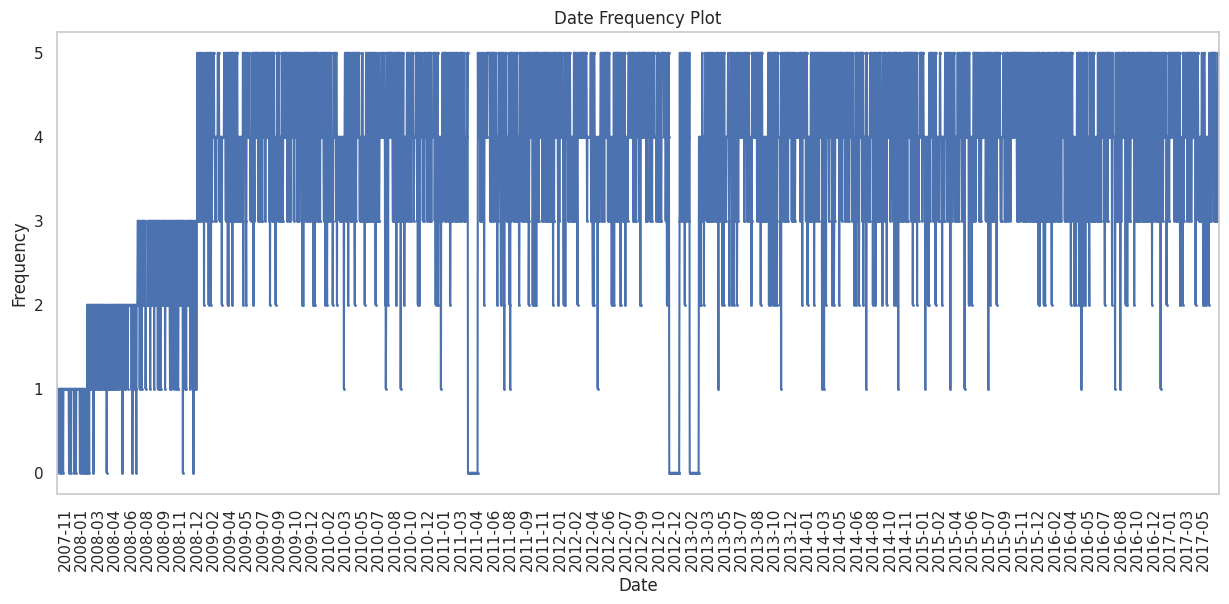

In [227]:
# Calculamos cuantos datos de cada día tenemos
date_range = pd.date_range(start=df_train['Date'].min(), end=df_train['Date'].max())
date_frequency = df_train.Date
date_frequency = df_train.groupby('Date').size().reindex(date_range, fill_value=0).reset_index(name='Frequency')
date_frequency = date_frequency.rename(columns={'index': 'Date'})

# Plot the date frequency
plt.figure(figsize=(15, 6))
plt.plot(date_frequency['Date'], date_frequency['Frequency'], marker='o', markersize = 1)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Date Frequency Plot')
plt.xlim(date_frequency['Date'].min(), date_frequency['Date'].max())
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))  # Set the interval between ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the date labels

plt.xticks(rotation=90)
plt.grid()
plt.show()

Codificación

Columna del número de día

In [228]:
def add_day_number(df):
    #Creamos columna que indique el tiempo pasado
    #elegimos un día random como referencia:
    reference_date = pd.to_datetime('2012-12-12')
    df['DayNumber'] = (df['Date'] - reference_date).dt.days
    return df

df_train = add_day_number(df_train)

Columnas del día del año codificadas trigonométricamente

In [229]:
def add_trig_date(df):
    # Para una mayor interpretabilidad, rotamos el calendario dejando la mitad del verano en los -90°
    day_of_midsummer = 30 + 15 - 10 # enero + medio febrero - 10 días del final de diciembre

    rotated_angle_of_the_year = (df.Date.dt.day_of_year - day_of_midsummer) * 2 * np.pi / 365.25

    df['Autumness'] = (np.sin(rotated_angle_of_the_year) + 1) / 2
    df['Summerness'] = (np.cos(rotated_angle_of_the_year) + 1) / 2
    return df

df_train = add_trig_date(df_train)

In [230]:
df_train[["Date", "Summerness", "Autumness"]]

Date  Summerness     Autumness
0     2007-11-01    0.466159  1.146554e-03
1     2007-11-02    0.474745  6.382380e-04
2     2007-11-03    0.483338  2.776915e-04
3     2007-11-05    0.500538  2.889877e-07
4     2007-11-06    0.509138  8.351511e-05
...          ...         ...           ...
12806 2017-06-24    0.128500  8.346452e-01
12807 2017-06-24    0.128500  8.346452e-01
12808 2017-06-24    0.128500  8.346452e-01
12809 2017-06-24    0.128500  8.346452e-01
12810 2017-06-24    0.128500  8.346452e-01

[12811 rows x 3 columns]

Visualización de como varían las variables a lo largo del tiempo

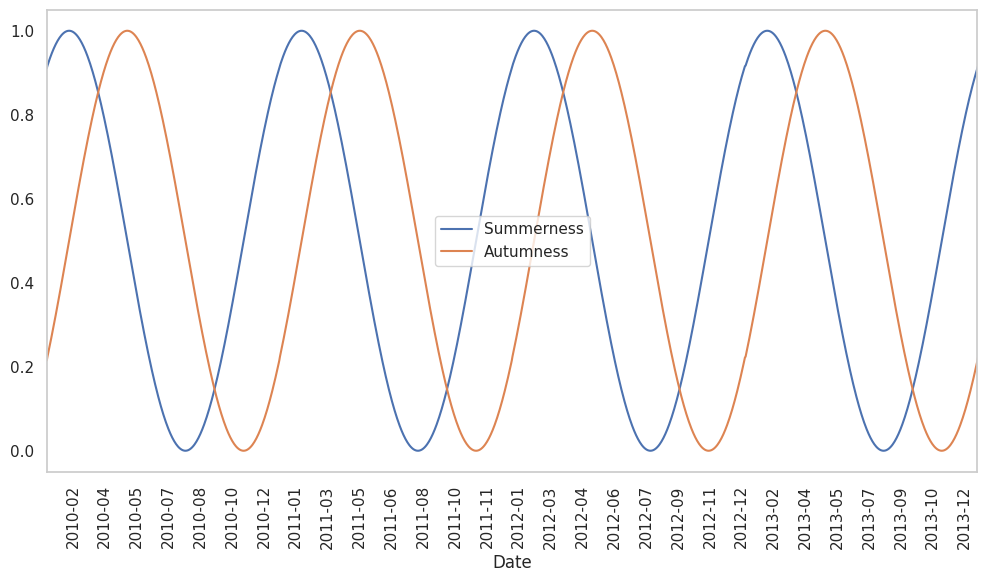

In [231]:
date_frequency = add_trig_date(date_frequency)

# Plot the date frequency
plt.figure(figsize=(12, 6))
plt.plot(date_frequency['Date'], date_frequency['Summerness'], label = 'Summerness')
plt.plot(date_frequency['Date'], date_frequency['Autumness'], label = 'Autumness')
plt.xlabel('Date')
plt.xlim(pd.to_datetime('2010-01-01'), pd.to_datetime('2013-12-31'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))  # Set the interval between ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the date labels
plt.xticks(rotation=90)
plt.legend()  # Add a legend to distinguish the lines
plt.grid()
plt.show()

In [232]:
df_train[["Date", "Summerness", "Autumness"]][df_train['Date'] == '2010-03-21']

Date  Summerness  Autumness
2532 2010-03-21    0.857522    0.84954

Como vemos, en el límite entre dos estaciones ambos valores dan altos

In [233]:
def drop_normal_date(df):
    return df.drop(columns=["Date"])

df_train = drop_normal_date(df_train)

Creamos subsubpipeline y la agregamos

In [234]:
date_codification = Pipeline([
    ('date_format', FunctionTransformer(datecolumn2dateformat)),
    ('add_day_number', FunctionTransformer(add_day_number)),
    ('add_trig_date', FunctionTransformer(add_trig_date)),
    ('drop_normal_date', FunctionTransformer(drop_normal_date))
])

In [235]:
categorical_features.steps.append(('date_codification', date_codification))

#### Viento

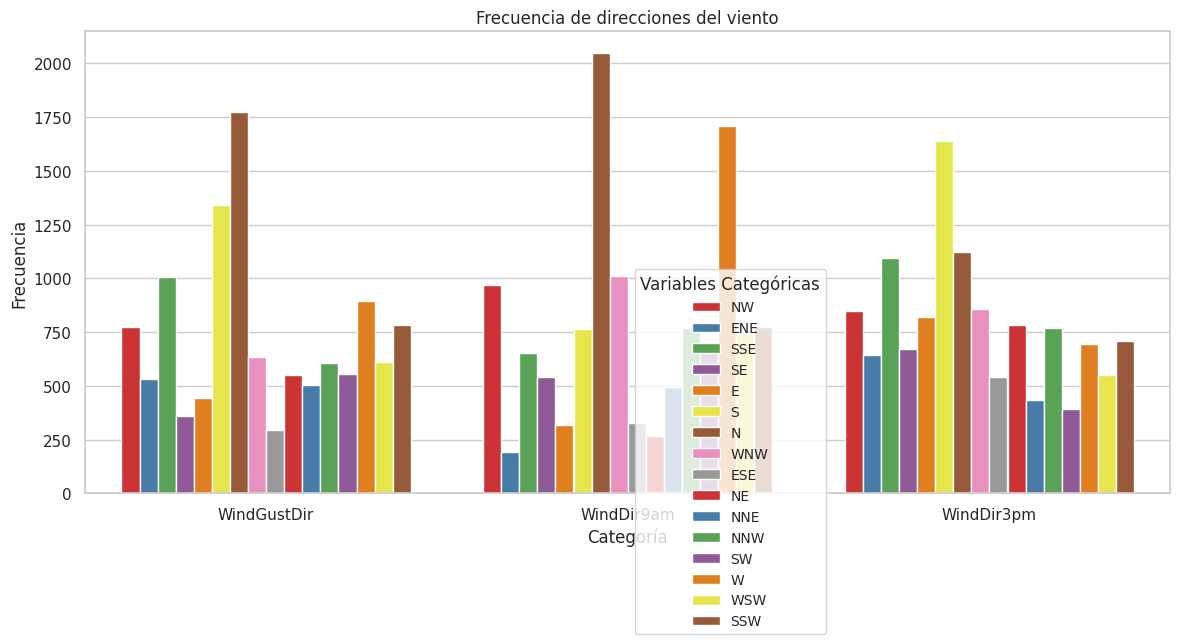

In [236]:
categorias =  ['WindGustDir', 'WindDir9am', 'WindDir3pm']

plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
sns.countplot(data=df_train.melt(value_vars=categorias), x='variable', hue='value', palette='Set1', order=categorias)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de direcciones del viento')

# Establece la ubicación de la referencia en la esquina superior izquierda
plt.legend(title='Variables Categóricas', loc='upper left', fontsize='small')

# Ajusta la orientación de las leyendas
plt.legend(title='Variables Categóricas', loc='upper left', fontsize='small', bbox_to_anchor=(0.5, 0.5), ncol=1)

plt.show()

Codificación

In [237]:
dir2ang = {
    'E': 0,
    'ESE': 22.5,
    'SE': 45,
    'SSE': 67.5,
    'S': 90,
    'SSW': 112.5,
    'SW': 135,
    'WSW': 157.5,
    'W': 180,
    'WNW': 202.5,
    'NW': 225,
    'NNW': 247.5,
    'N': 270,
    'NNE': 292.5,
    'NE': 315,
    'ENE': 337.5
}

In [238]:
def dirspeed2velxy(dire, speed):
    if pd.isna(dire) or pd.isna(speed):
        return np.nan, np.nan

    angle = dir2ang[dire]
    sin = np.sin(np.radians(angle))
    cos = np.cos(np.radians(angle))
    vely = sin * speed
    velx = cos * speed
    return velx, vely

Transformamos los 3 pares de columnas con datos sobre el viento

In [239]:
def add_velxy(df):
    # Create new columns for sine and cosine of wind direction angles
    #9am
    aux = df.apply(lambda row: dirspeed2velxy(row['WindDir9am'], row['WindSpeed9am']), axis=1)
    df[['Wind9amVelX', 'Wind9amVelY']] = pd.Series(zip(*aux))

    #3pm
    aux = df.apply(lambda row: dirspeed2velxy(row['WindDir3pm'], row['WindSpeed3pm']), axis=1)
    df[['Wind3pmVelX', 'Wind3pmVelY']] = pd.Series(zip(*aux))

    #gust
    aux = df.apply(lambda row: dirspeed2velxy(row['WindGustDir'], row['WindGustSpeed']), axis=1)
    df[['WindGustVelX', 'WindGustVelY']] = pd.Series(zip(*aux))

    return df

df_train = add_velxy(df_train)

In [240]:
df_train[["WindDir9am", 'WindSpeed9am', "Wind9amVelX", "Wind9amVelY"]]

WindDir9am  WindSpeed9am   Wind9amVelX   Wind9amVelY
0             SW           6.0 -4.242641e+00  4.242641e+00
1              E           4.0  4.000000e+00  0.000000e+00
2              N           6.0 -1.102182e-15 -6.000000e+00
3            SSE          20.0  7.653669e+00  1.847759e+01
4             SE          20.0  1.414214e+01  1.414214e+01
...          ...           ...           ...           ...
12806          N          20.0 -3.673940e-15 -2.000000e+01
12807        WNW          11.0 -1.016267e+01 -4.209518e+00
12808          W          17.0 -1.700000e+01  2.081900e-15
12809          W          17.0 -1.700000e+01  2.081900e-15
12810        WNW          22.0 -2.032535e+01 -8.419036e+00

[12811 rows x 4 columns]

In [241]:
def drop_og_wind(df):
    return df.drop(columns=['WindDir9am', 'WindDir3pm', 'WindGustDir', 'WindSpeed9am', 'WindSpeed3pm', 'WindGustSpeed'])

df_train = drop_og_wind(df_train)

Agregamos esto como subsubpipeline

In [242]:
wind_codification = Pipeline([
    ('add_velxy', FunctionTransformer(add_velxy)),
    ('drop_og_wind', FunctionTransformer(drop_og_wind))
])

In [243]:
categorical_features.steps.append(('wind_codification', wind_codification))

#### Lluvia o no lluvia

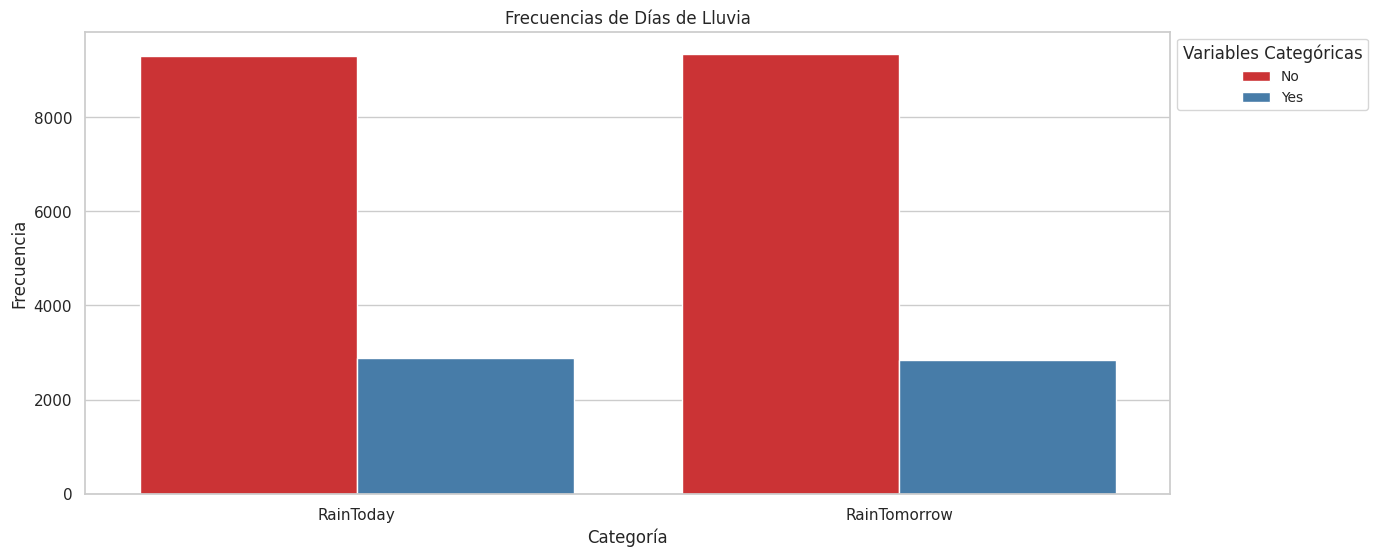

In [244]:
categorias =  ['RainToday', 'RainTomorrow']

plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
sns.countplot(data=df_train.melt(value_vars=categorias), x='variable', hue='value', palette='Set1', order=categorias)
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de Días de Lluvia')


plt.legend(title='Variables Categóricas', loc='upper left', fontsize='small')


plt.legend(title='Variables Categóricas', loc='upper left', fontsize='small', bbox_to_anchor=(1, 1), ncol=1)

plt.show()

Se ve claramente que el dataset no está balanceado en positivos y negativos

In [245]:
def yn2bin(df):
    df.RainToday = df.RainToday.replace({'No': 0, 'Yes': 1})
    df.RainTomorrow = df.RainTomorrow.replace({'No': 0, 'Yes': 1})
    return df

df_train = yn2bin(df_train)

Pipelines

In [246]:
rain_codification = Pipeline([
    ('yn2bin', FunctionTransformer(yn2bin))
])

In [247]:
categorical_features.steps.append(('rain_codification', rain_codification))

**Dataframe después de codificaciones**

In [248]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           12409 non-null  float64
 1   MaxTemp           12413 non-null  float64
 2   Rainfall          12180 non-null  float64
 3   Evaporation       11430 non-null  float64
 4   Sunshine          11240 non-null  float64
 5   Humidity9am       12349 non-null  float64
 6   Humidity3pm       12380 non-null  float64
 7   Pressure9am       12213 non-null  float64
 8   Pressure3pm       12222 non-null  float64
 9   Cloud9am          10674 non-null  float64
 10  Cloud3pm          10476 non-null  float64
 11  Temp9am           12398 non-null  float64
 12  Temp3pm           12404 non-null  float64
 13  RainToday         12180 non-null  float64
 14  RainTomorrow      12177 non-null  float64
 15  RainfallTomorrow  12177 non-null  float64
 16  DayNumber         12811 non-null  int64 

### Valores atípicos

<Figure size 2200x1500 with 0 Axes>

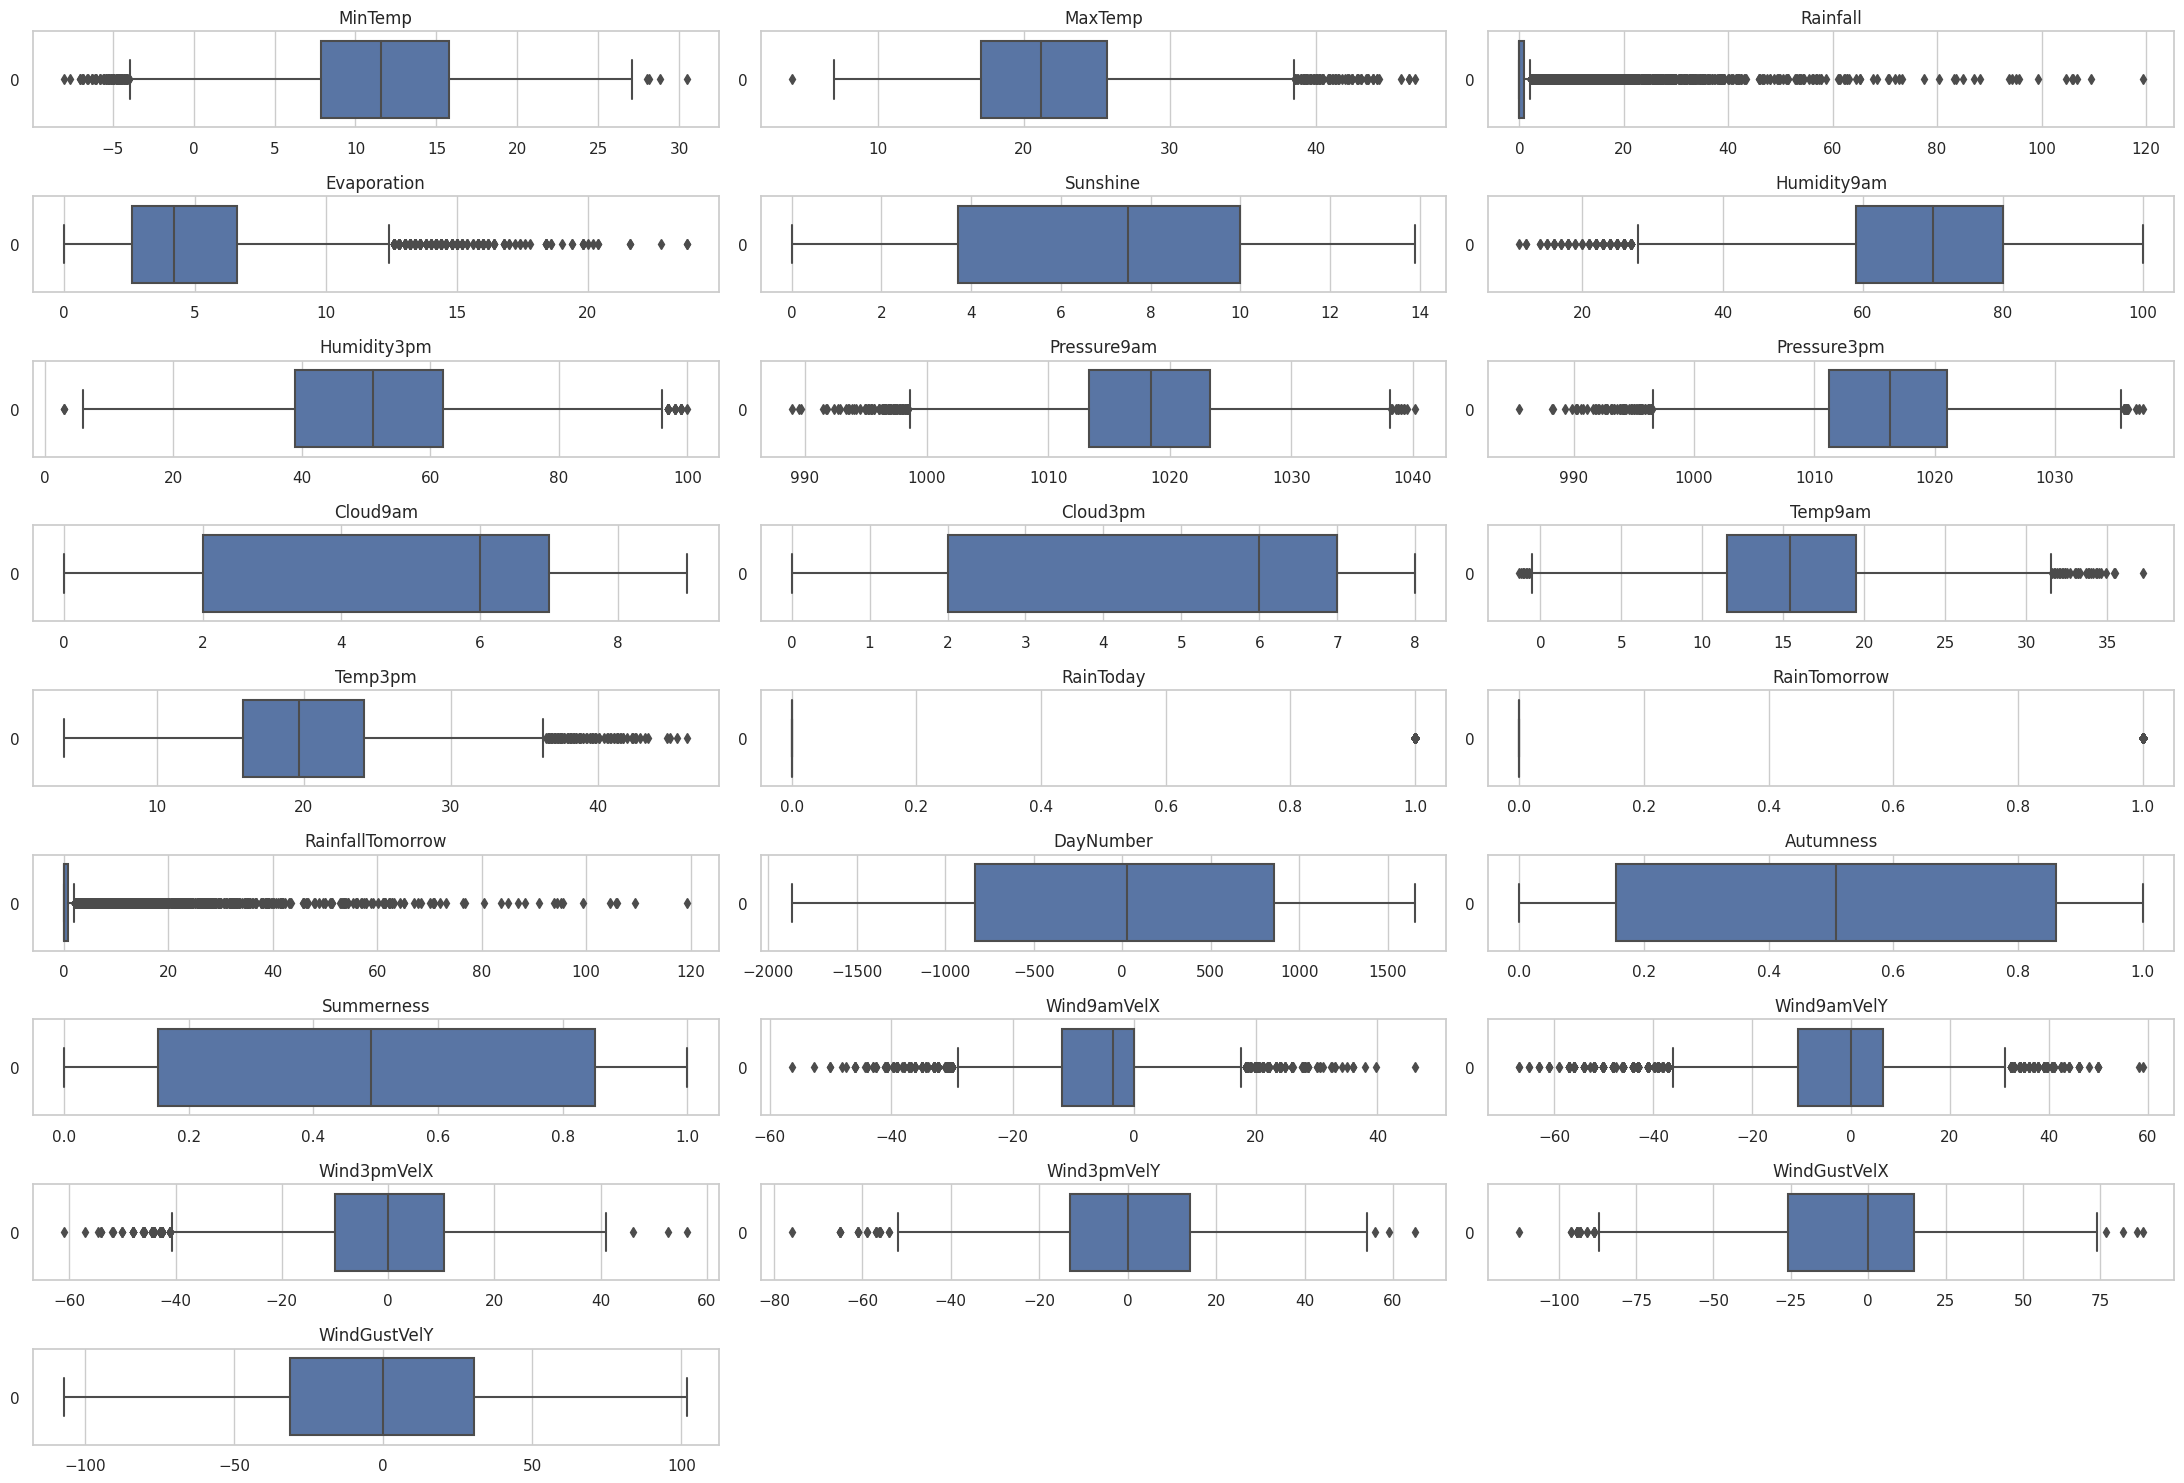

In [249]:

plt.figure(figsize=(22, 15))

# Filtra las columnas numéricas
numerical_columns = df_train.select_dtypes(include=[pd.np.number]).columns


num_cols = 3
num_rows = len(numerical_columns) // num_cols + 1

# Crear subgráficos en un diseño de cuadrícula
fig, axes = plt.subplots(num_rows, num_cols, figsize=(22, 15))

for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.boxplot(data=df_train[column], ax=ax, orient='h')  # Establece orientación horizontal
    ax.set_title(column)

# Eliminar subgráficos vacíos si el número de columnas no es múltiplo de 3
for i in range(len(numerical_columns), num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

# Ajustar el diseño
plt.tight_layout()
plt.show()

**Observación**:
En los gráficos de caja y bigotes de las diferentes features podemos observar que en las variables 'Rainfall' y 'RainfallTomorrow' se observa la mayor cantidad de valores atípicos con respecto a las demás, y ambas están sesgadas a la derecha.

### Selección de características




In [250]:
def feature_selection(df):
    return df.drop(columns=['RainToday'])

df_train = feature_selection(df_train)

In [251]:
preprocesamiento.steps.append(("feature_selection", FunctionTransformer(feature_selection)))

#### Correlaciones

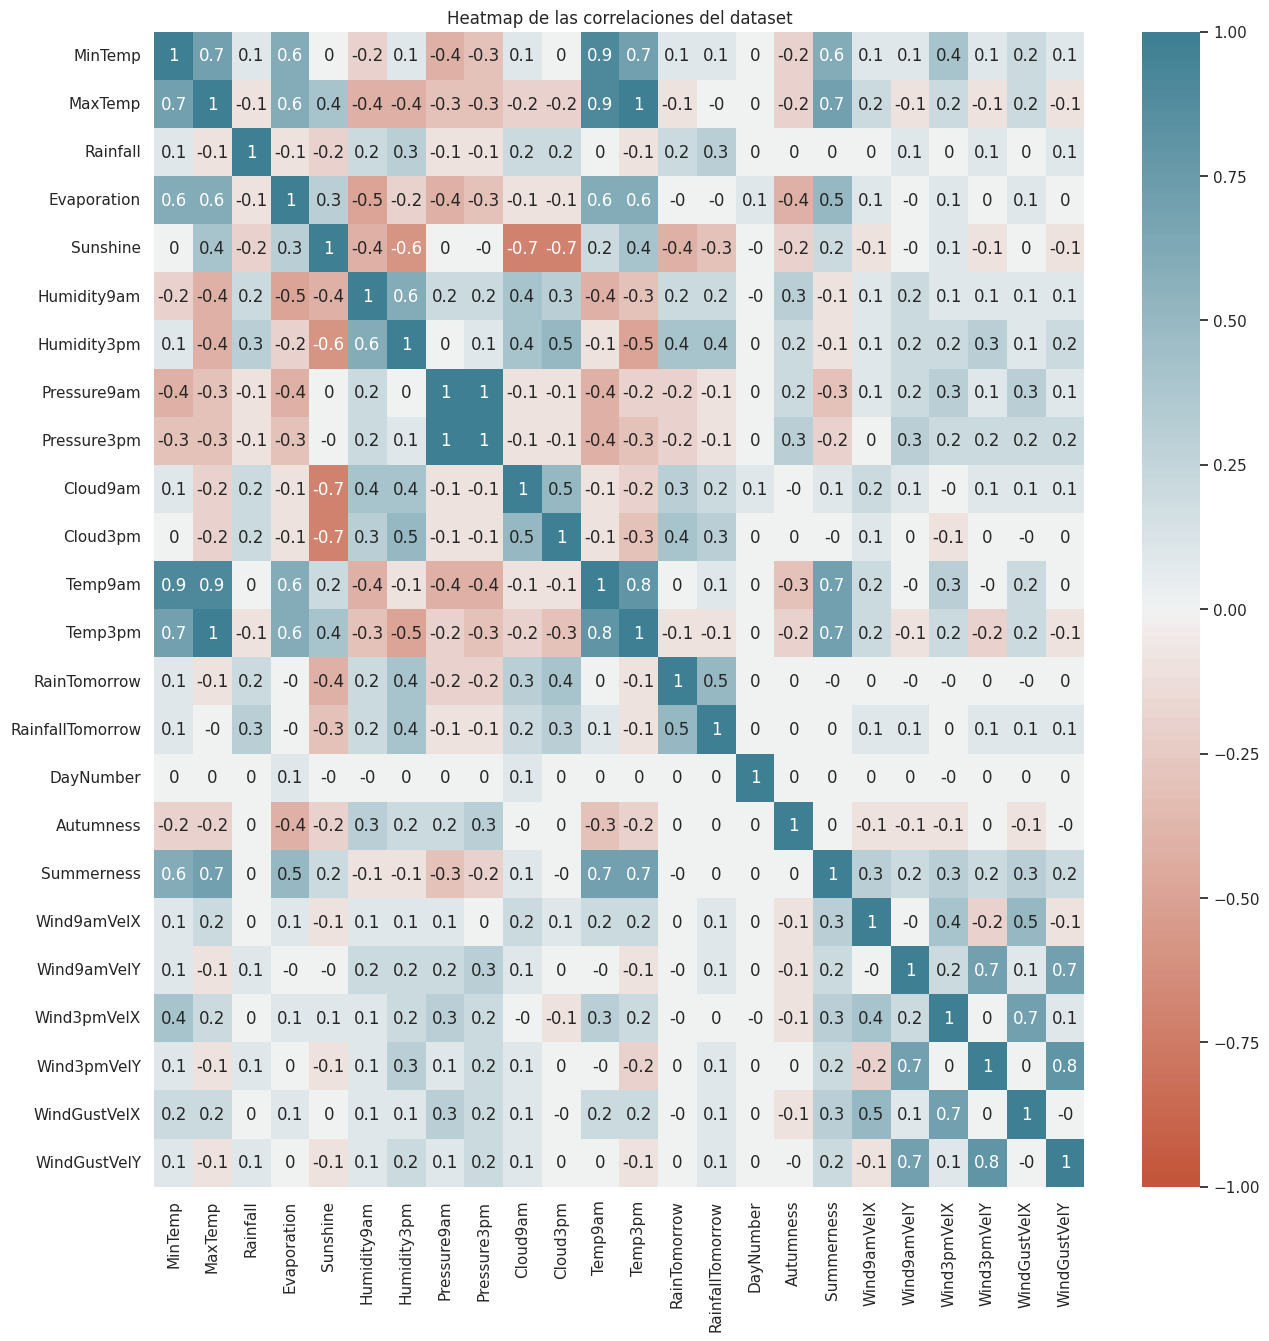

In [252]:
# Buscar correlación entre las variables:
plt.figure(figsize=(15,15))
df_corr = df_train.corr()
# Redondear los valores de la matriz de correlación
df_corr_rounded = df_corr.round(1)
ax = sns.heatmap(
    df_corr_rounded,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    annot=True
)
plt.title('Heatmap de las correlaciones del dataset')
plt.show()

Podemos observar una fuerte correlación  entre las variables 'Min Temp' y 'Temp9am'.
También entre 'MaxTemp' y 'Temp3pm'.

'Pressure9am' y 'Pressure3pm' tienen una fuerte correlación también.
Hay correlación entre las variables de temperaturas.
La variable 'WindGustVelY' esta relacionada con 'Win3pmVelY' y con 'Win9amVelY'.
Estas son las correlaciones más fuertes que modemos observar en la matriz.


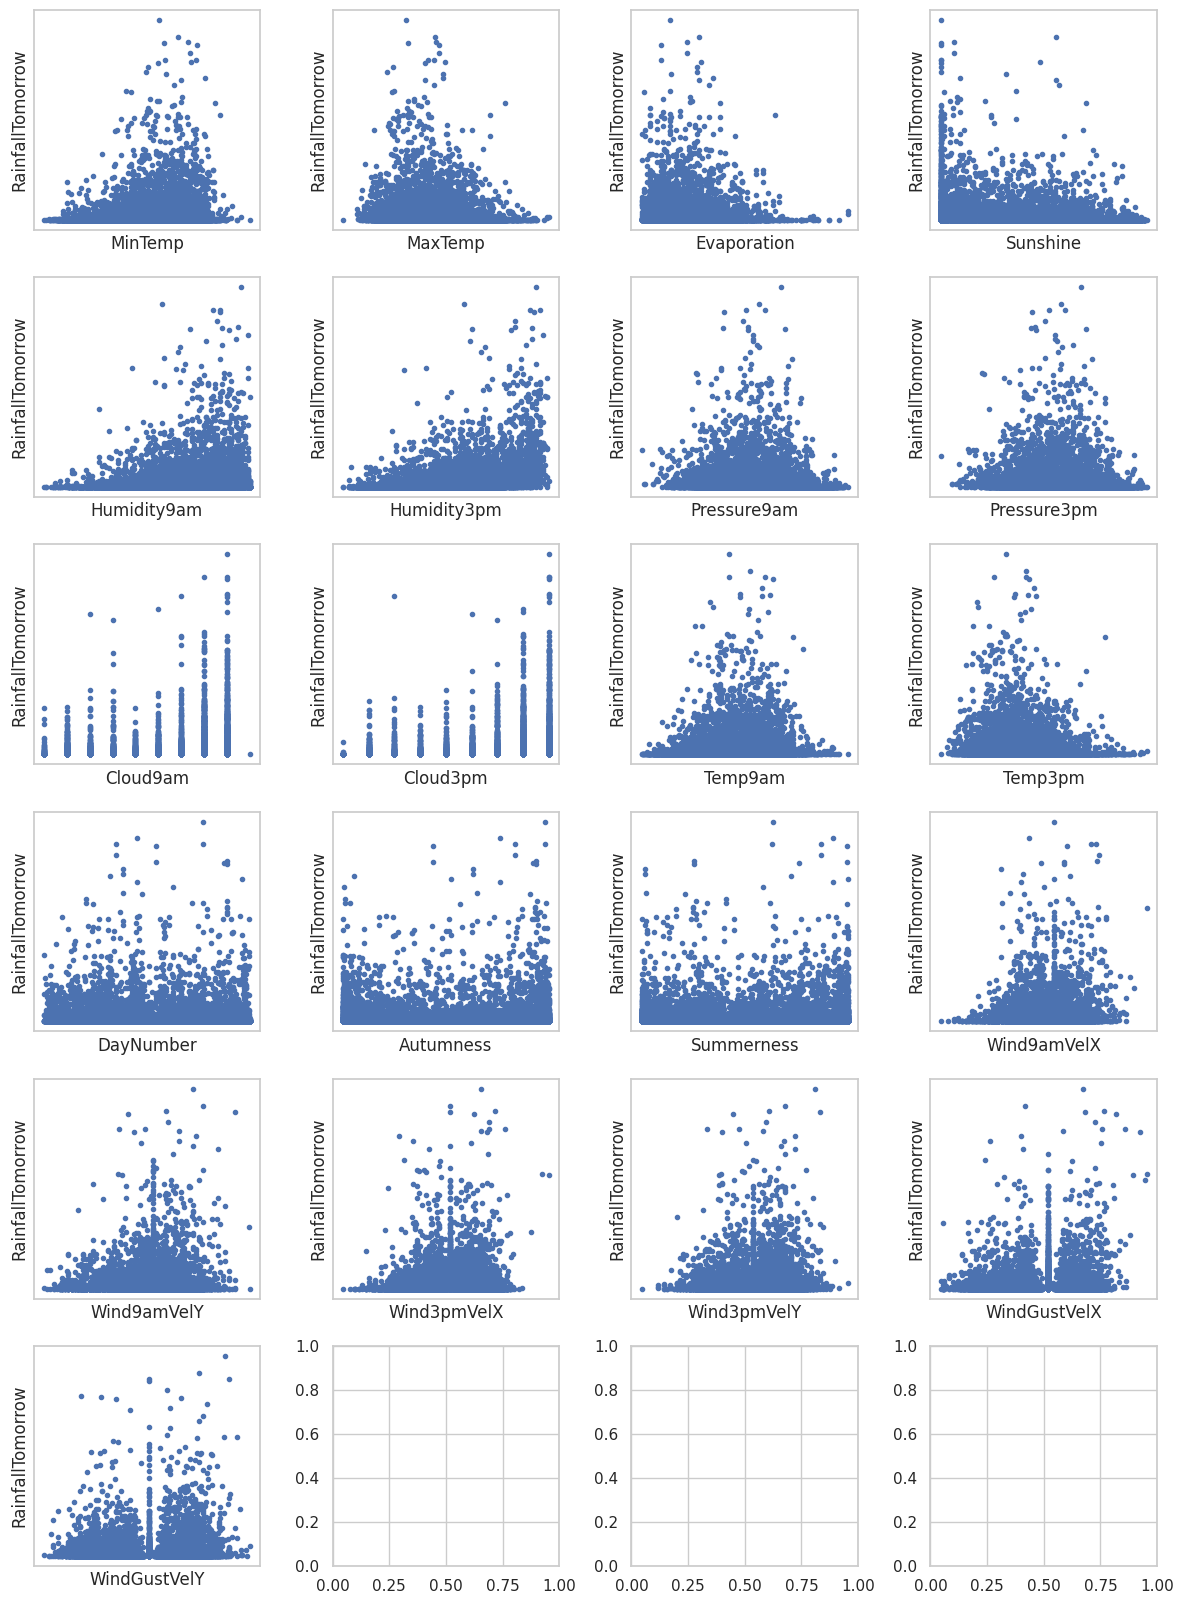

In [253]:
cols2graph = df_train.drop(columns=["Rainfall", "RainfallTomorrow", "RainTomorrow"]).columns

nplots = len(cols2graph)
ncols = 4
nrows = math.ceil(nplots/ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 2.7*nrows))
axes = axes.flatten()

# Create scatterplots or other plots on custom axes
for i in range(nplots):
    col2graph = cols2graph[i]
    axes[i].plot(df_train[col2graph], 'RainfallTomorrow', 'o', data=df_train, markersize = 3)

    # Set the x-axis and y-axis labels for each subplot
    axes[i].set_xlabel(col2graph)
    axes[i].set_ylabel('RainfallTomorrow')
    axes[i].set_xticks([])
    axes[i].set_yticks([])

# Adjust subplot layout
plt.tight_layout()
# Show the plot
plt.show()

### Valores faltantes

In [254]:
def drop_nan_targets(df):
    df = df.dropna(subset=['RainfallTomorrow'])
    df.reset_index(drop=True)
    return df

df_train = drop_nan_targets(df_train)

In [255]:
df_train.isna().sum()

MinTemp                9
MaxTemp                6
Rainfall             128
Evaporation         1369
Sunshine            1562
Humidity9am           68
Humidity3pm           39
Pressure9am          204
Pressure3pm          196
Cloud9am            1623
Cloud3pm            1810
Temp9am               20
Temp3pm               15
RainTomorrow           0
RainfallTomorrow       0
DayNumber              0
Autumness              0
Summerness             0
Wind9amVelX          538
Wind9amVelY          538
Wind3pmVelX          232
Wind3pmVelY          232
WindGustVelX        1134
WindGustVelY        1134
dtype: int64

In [256]:
df_train

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0          8.0     24.3       0.0          3.4       6.3         68.0   
1         14.0     26.9       3.6          4.4       9.7         80.0   
2         13.7     23.4       3.6          5.8       3.3         82.0   
3          7.6     16.1       2.8          5.6      10.6         68.0   
4          6.2     16.9       0.0          5.8       8.2         70.0   
...        ...      ...       ...          ...       ...          ...   
12806      0.1     14.4       0.0          NaN       NaN         68.0   
12807      8.3     12.3       1.4          1.8       5.6         75.0   
12808      5.7     12.6       1.2          1.8       5.6         80.0   
12809     10.1     19.3       0.0          1.4       9.3         56.0   
12810      9.4     19.9       0.0          1.4       9.3         61.0   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  ...  RainfallTomorrow  \
0             29.0       1019.7       1015.0       7.0  ...               3.6   
1             36.0       1012.4       1008.4       5.0  ...               3.6   
2             69.0       1009.5       1007.2       8.0  ...              39.8   
3             49.0       1018.3       1018.5       7.0  ...               0.0   
4             57.0       1023.8       1021.7       7.0  ...               0.2   
...            ...          ...          ...       ...  ...               ...   
12806         45.0       1017.5       1016.2       NaN  ...               0.0   
12807         63.0       1018.7       1017.4       2.0  ...               0.0   
12808         50.0       1018.9       1017.5       2.0  ...               0.0   
12809         35.0       1017.3       1015.1       5.0  ...               0.0   
12810         41.0       1017.3       1015.2       5.0  ...               0.0   

       DayNumber     Autumness  Summerness   Wind9amVelX   Wind9amVelY  \
0          -1868  1.146554e-03    0.466159 -4.242641e+00  4.242641e+00   
1          -1867  6.382380e-04    0.474745  4.000000e+00  0.000000e+00   
2          -1866  2.776915e-04    0.483338 -1.102182e-15 -6.000000e+00   
3          -1864  2.889877e-07    0.500538  7.653669e+00  1.847759e+01   
4          -1863  8.351511e-05    0.509138  1.414214e+01  1.414214e+01   
...          ...           ...         ...           ...           ...   
12806       1655  8.346452e-01    0.128500 -3.673940e-15 -2.000000e+01   
12807       1655  8.346452e-01    0.128500 -1.016267e+01 -4.209518e+00   
12808       1655  8.346452e-01    0.128500 -1.700000e+01  2.081900e-15   
12809       1655  8.346452e-01    0.128500 -1.700000e+01  2.081900e-15   
12810       1655  8.346452e-01    0.128500 -2.032535e+01 -8.419036e+00   

        Wind3pmVelX   Wind3pmVelY  WindGustVelX  WindGustVelY  
0     -1.414214e+01 -1.414214e+01    -21.213203 -2.121320e+01  
1     -1.700000e+01  2.081900e-15     36.031302 -1.492465e+01  
2      2.296101e+00 -5.543277e+00    -60.104076 -6.010408e+01  
3      2.586863e+01  1.071514e+01     19.134172  4.619398e+01  
4      2.400000e+01  0.000000e+00     31.112698  3.111270e+01  
...             ...           ...           ...           ...  
12806 -1.979899e+01 -1.979899e+01    -33.941125 -3.394113e+01  
12807  1.224647e-16  2.000000e+00    -21.213203  2.121320e+01  
12808 -7.000000e+00  8.572528e-16    -23.334524  2.333452e+01  
12809 -1.900000e+01  2.326829e-15    -43.000000  5.265981e-15  
12810 -2.800000e+01  3.429011e-15    -30.405592  3.040559e+01  

[12177 rows x 24 columns]

In [257]:
# Custom transformer for imputation that returns a DataFrame
class DataFrameImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean'):
        self.strategy = strategy

    def fit(self, X, y=None):
        self.imputer = SimpleImputer(strategy=self.strategy)
        self.imputer.fit(X)
        return self

    def transform(self, X):
        transformed_array = self.imputer.transform(X)
        return pd.DataFrame(transformed_array, columns=X.columns)

In [258]:
fill_nans = DataFrameImputer(strategy='mean')
df_train = fill_nans.fit_transform(df_train)

In [259]:
df_train

MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  Humidity9am  \
0          8.0     24.3       0.0     3.400000   6.300000         68.0   
1         14.0     26.9       3.6     4.400000   9.700000         80.0   
2         13.7     23.4       3.6     5.800000   3.300000         82.0   
3          7.6     16.1       2.8     5.600000  10.600000         68.0   
4          6.2     16.9       0.0     5.800000   8.200000         70.0   
...        ...      ...       ...          ...        ...          ...   
12172      0.1     14.4       0.0     4.862454   6.899878         68.0   
12173      8.3     12.3       1.4     1.800000   5.600000         75.0   
12174      5.7     12.6       1.2     1.800000   5.600000         80.0   
12175     10.1     19.3       0.0     1.400000   9.300000         56.0   
12176      9.4     19.9       0.0     1.400000   9.300000         61.0   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  ...  RainfallTomorrow  \
0             29.0       1019.7       1015.0  7.000000  ...               3.6   
1             36.0       1012.4       1008.4  5.000000  ...               3.6   
2             69.0       1009.5       1007.2  8.000000  ...              39.8   
3             49.0       1018.3       1018.5  7.000000  ...               0.0   
4             57.0       1023.8       1021.7  7.000000  ...               0.2   
...            ...          ...          ...       ...  ...               ...   
12172         45.0       1017.5       1016.2  4.741899  ...               0.0   
12173         63.0       1018.7       1017.4  2.000000  ...               0.0   
12174         50.0       1018.9       1017.5  2.000000  ...               0.0   
12175         35.0       1017.3       1015.1  5.000000  ...               0.0   
12176         41.0       1017.3       1015.2  5.000000  ...               0.0   

       DayNumber     Autumness  Summerness   Wind9amVelX   Wind9amVelY  \
0        -1868.0  1.146554e-03    0.466159 -4.242641e+00  4.242641e+00   
1        -1867.0  6.382380e-04    0.474745  4.000000e+00  0.000000e+00   
2        -1866.0  2.776915e-04    0.483338 -1.102182e-15 -6.000000e+00   
3        -1864.0  2.889877e-07    0.500538  7.653669e+00  1.847759e+01   
4        -1863.0  8.351511e-05    0.509138  1.414214e+01  1.414214e+01   
...          ...           ...         ...           ...           ...   
12172     1655.0  8.346452e-01    0.128500 -3.673940e-15 -2.000000e+01   
12173     1655.0  8.346452e-01    0.128500 -1.016267e+01 -4.209518e+00   
12174     1655.0  8.346452e-01    0.128500 -1.700000e+01  2.081900e-15   
12175     1655.0  8.346452e-01    0.128500 -1.700000e+01  2.081900e-15   
12176     1655.0  8.346452e-01    0.128500 -2.032535e+01 -8.419036e+00   

        Wind3pmVelX   Wind3pmVelY  WindGustVelX  WindGustVelY  
0     -1.414214e+01 -1.414214e+01    -21.213203 -2.121320e+01  
1     -1.700000e+01  2.081900e-15     36.031302 -1.492465e+01  
2      2.296101e+00 -5.543277e+00    -60.104076 -6.010408e+01  
3      2.586863e+01  1.071514e+01     19.134172  4.619398e+01  
4      2.400000e+01  0.000000e+00     31.112698  3.111270e+01  
...             ...           ...           ...           ...  
12172 -1.979899e+01 -1.979899e+01    -33.941125 -3.394113e+01  
12173  1.224647e-16  2.000000e+00    -21.213203  2.121320e+01  
12174 -7.000000e+00  8.572528e-16    -23.334524  2.333452e+01  
12175 -1.900000e+01  2.326829e-15    -43.000000  5.265981e-15  
12176 -2.800000e+01  3.429011e-15    -30.405592  3.040559e+01  

[12177 rows x 24 columns]

In [260]:
df_train.isna().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainTomorrow        0
RainfallTomorrow    0
DayNumber           0
Autumness           0
Summerness          0
Wind9amVelX         0
Wind9amVelY         0
Wind3pmVelX         0
Wind3pmVelY         0
WindGustVelX        0
WindGustVelY        0
dtype: int64

Agregamos el imputer al pipeline

In [261]:
imputer = Pipeline([
    ('drop_nan_targets', FunctionTransformer(drop_nan_targets)),
    ('fill_nans', fill_nans)
])

In [262]:
preprocesamiento.steps.append(('imputer', imputer))

### Escalado de Características: Estandarización

In [263]:
def x_ys_splitter(df):
    # Column names for the transformations
    target_columns = ['RainfallTomorrow', 'RainTomorrow']
    columns_to_scale = df.drop(columns=target_columns).columns
    df_x = df.drop(columns=target_columns)
    df_y_reg, df_y_class = df[target_columns[0]], df[target_columns[1]]
    return df_x, df_y_reg, df_y_class

df_x_train, df_y_reg_train, df_y_class_train = x_ys_splitter(df_train)

In [264]:
splitter = Pipeline([
    ('x_ys_splitter', FunctionTransformer(x_ys_splitter))
])

In [265]:
preprocesamiento.steps.append(('splitter', splitter))

In [266]:
class StandardScalerFor3Tuple:
    def __init__(self):
        self.mean_ = None
        self.scale_ = None

    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.scale_ = np.std(X, axis=0)
        return self

    def transform(self, X, y1=None, y2=None):
        if y1 is None:
            y1 = X[1]
            y2 = X[2]
            X = X[0]

        if self.mean_ is None or self.scale_ is None:
            raise ValueError("Scaler has not been fitted yet.")
        scaled_X = (X - self.mean_) / self.scale_
        return scaled_X.values, y1.values, y2.values

    def fit_transform(self, X, y1=None, y2=None):
        if y1 is None:
            y1 = X[1]
            y2 = X[2]
            X = X[0]

        return self.fit(X).transform(X, y1, y2)

In [267]:
extracting_and_scaling = StandardScalerFor3Tuple()
x_train, y_reg_train, y_class_train = extracting_and_scaling.fit_transform(df_x_train, df_y_reg_train, df_y_class_train)

In [268]:
preprocesamiento.steps.append(('extracting_and_scaling', extracting_and_scaling))

Chequeamos el funcionamiento correcto del pipeline

In [269]:
x_train_copy, y_reg_train_copy, y_class_train_copy = preprocesamiento.fit_transform(df_train_copy)

In [270]:
print(np.all(x_train == x_train_copy))
print(np.all(y_reg_train == y_reg_train_copy))
print(np.all(y_class_train == y_class_train_copy))

True
True
True


## Transformación de los datos de test con el pipeline

In [271]:
x_test, y_reg_test, y_class_test = preprocesamiento.transform(df_test)

In [272]:
print(x_test)
print(y_reg_test)
print(y_class_test)

[[ 0.29430837 -1.03169434  5.09166721 ...  0.00697603 -1.19795915
  -1.02754215]
 [-0.52508169  0.91550591 -0.28676533 ... -0.58480023  1.71201874
   0.06888863]
 [-0.25195167  1.55907209 -0.31392913 ...  0.00697603 -0.86014184
  -0.76358659]
 ...
 [-0.04710415 -0.28911798  0.28367449 ...  0.4708918  -0.75020967
   0.06888863]
 [-2.04436743 -1.2957215  -0.31392913 ... -1.12704029 -0.75619806
  -0.6823695 ]
 [-1.5663899  -1.44423677 -0.31392913 ... -1.05309479  0.20528195
  -1.05097996]]
[2.8 0.  0.  ... 0.  0.4 0. ]
[1. 0. 0. ... 0. 0. 0.]


##Modelos base

### Regresión

Predicción de la media

In [273]:
# Calcular la media de y_reg_train como predicciones
y_predict = np.mean(y_reg_train)            #media

# Calcular el MAE
mae = mean_absolute_error(y_reg_test, [y_predict] * len(y_reg_test))
print(mae)

3.517297927486625


MAE prediciendo con la media = 3,52

###Clasificación

In [274]:
def f1_avg(y_true, y_pred):
    from sklearn.metrics import f1_score
    return f1_score(y_true, y_pred, average='macro')

Bosques aleatorios

In [275]:
from sklearn.ensemble import RandomForestClassifier

# Crea y entrena un modelo de bosque aleatorio
rng_forest = RandomForestClassifier(random_state=42)
rng_forest.fit(x_train, y_class_train)

# Hace predicciones en el conjunto de prueba
y_pred = rng_forest.predict(x_test)

# Calcula la métrica F1 para el modelo de bosque aleatorio
f1_rf = f1_avg(y_class_test, y_pred)

print(f1_rf)

0.7809282234382706


Después de probar con varios modelos, decidimos quedarnos con el de  RandomForest, ya que era el modelo que obtenía los mejores resultados, con un F1 = 0,78.

## Regresión Lineal

In [276]:
"""
shapes:
    x_train = nxm
    y_reg_train = nx1
    x_test = pxm
    y_reg_test = px1
    W = mx1
"""
n = x_train.shape[0]
m = x_train.shape[1]
p = x_test.shape[0]

### LinearRegression

In [277]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_reg_train);

#### Valores Predichos vs Verdaderos

In [278]:
y_pred = lin_reg.predict(x_test)

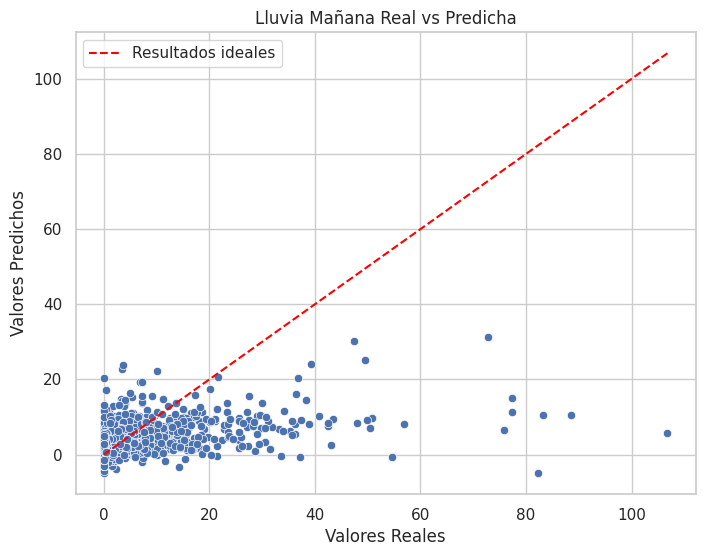

In [279]:
# Create a scatter plot to compare the actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_reg_test, y=y_pred)
plt.title("Lluvia Mañana Real vs Predicha")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")

# Plot a 45-degree diagonal line
plt.plot([min(y_reg_test), max(y_reg_test)], [min(y_reg_test), max(y_reg_test)], color='red', linestyle='--', label='Resultados ideales')
plt.legend()

plt.show()

Los puntos no parecen estar bastante lejos de la línea en 45°, por lo tanto parecería haber underfitting.

#### Métricas

In [280]:
mae = mean_absolute_error(y_reg_train, lin_reg.predict(x_train))
print(mae)

3.1477598110500455


MAE del modelo de LinearRegression sobre el training set = 3,15

In [281]:
mae = mean_absolute_error(y_reg_test, y_pred)
print(mae)

3.184477626031427


MAE del modelo de LinearRegression sobre el test set = 3,18

### Gradiente Descendiente

In [282]:
class GradientDescent:
    def __init__(self, epochs = 1000, learning_rate = 0.01):
        self.epochs = epochs
        self.learning_rate = learning_rate

    def descend(self, x_train, x_test, y_reg_train, y_reg_test, epochs = None, learning_rate = None):
        if epochs is None:
            epochs = self.epochs
        if learning_rate is None:
            learning_rate = self.learning_rate
        # Dimensiones
        n = x_train.shape[0]
        m = x_train.shape[1]
        p = x_test.shape[0]
        # Poner columna de unos a las matrices X
        self.x_train_1s = np.hstack((np.ones((n, 1)), x_train))
        self.x_test_1s = np.hstack((np.ones((p, 1)), x_test))
        # Inicializar pesos aleatorios
        self.W = np.random.randn(m+1).reshape(m+1, 1)
        self.train_errors = []  # Para almacenar el error de entrenamiento en cada época
        self.test_errors = []   # Para almacenar el error de prueba en cada época

        for i in range(epochs):
            #Test set error
            self.y_pred_test = np.matmul(self.x_test_1s, self.W)
            error_test = y_reg_test.reshape(-1,1) - self.y_pred_test
            self.test_mse = np.mean(error_test ** 2)
            self.test_errors.append(self.test_mse)

            #Training set error
            self.y_pred_train = np.matmul(self.x_train_1s, self.W)
            error_train = y_reg_train.reshape(-1,1) - self.y_pred_train
            self.train_mse = np.mean(error_train ** 2)
            self.train_errors.append(self.train_mse)

            # Gradiente
            grad_sum = np.sum(error_train * self.x_train_1s, axis=0)
            grad_mul = -2/n * grad_sum  # 1xm
            gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1
            # Actualizar pesos
            self.W = self.W - (learning_rate * gradient)

    def predict(self, x):
        n = x.shape[0]
        x_1s = np.hstack((np.ones((n, 1)), x))
        return np.matmul(self.x_1s, self.W)

In [283]:
grad_desc = GradientDescent()
grad_desc.descend(x_train, x_test, y_reg_train, y_reg_test)
y_pred = grad_desc.y_pred_test

#### Errores por épocas

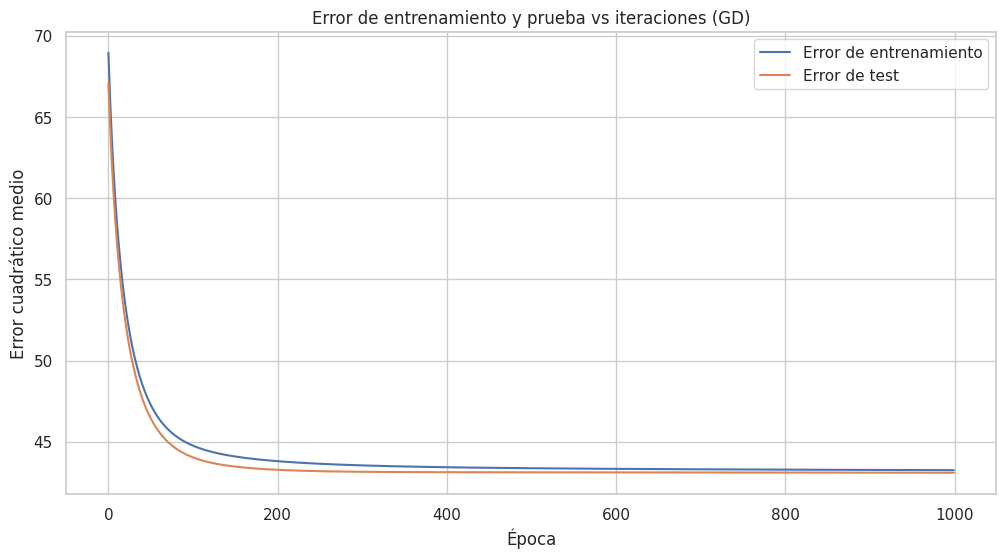

In [284]:
# Graficar errores de entrenamiento y prueba

plt.figure(figsize=(12, 6))
# Plotear errores de entrenamiento
plt.plot(grad_desc.train_errors, label='Error de entrenamiento')
# Plotear errores de prueba
plt.plot(grad_desc.test_errors, label='Error de test')
# Poner labels en los ejes
plt.xlabel('Época')
plt.ylabel('Error cuadrático medio')

plt.legend()
# titulo
plt.title('Error de entrenamiento y prueba vs iteraciones (GD)')
# Terminar y mostrar gráfico
plt.show()

#### Métricas

In [285]:
mae = mean_absolute_error(y_reg_test, y_pred)
print(mae)

3.185326769491777


MAE del modelo de GradientDescent sobre el test set = 3,17

### Regularizaciones

#### Lasso

In [286]:
# Creación del modelo Lasso con validación cruzada para encontrar el valor óptimo de alpha
lasso = LassoCV(alphas=np.logspace(-10, 10, 200), cv=10)
lasso.fit(x_train, y_reg_train)

# Predicciones con el modelo Lasso
y_pred = lasso.predict(x_test)

In [287]:
print("Mejor Alfa:", lasso.alpha_)

Mejor Alfa: 0.0027364399970746718


##### Parámetros regularizados

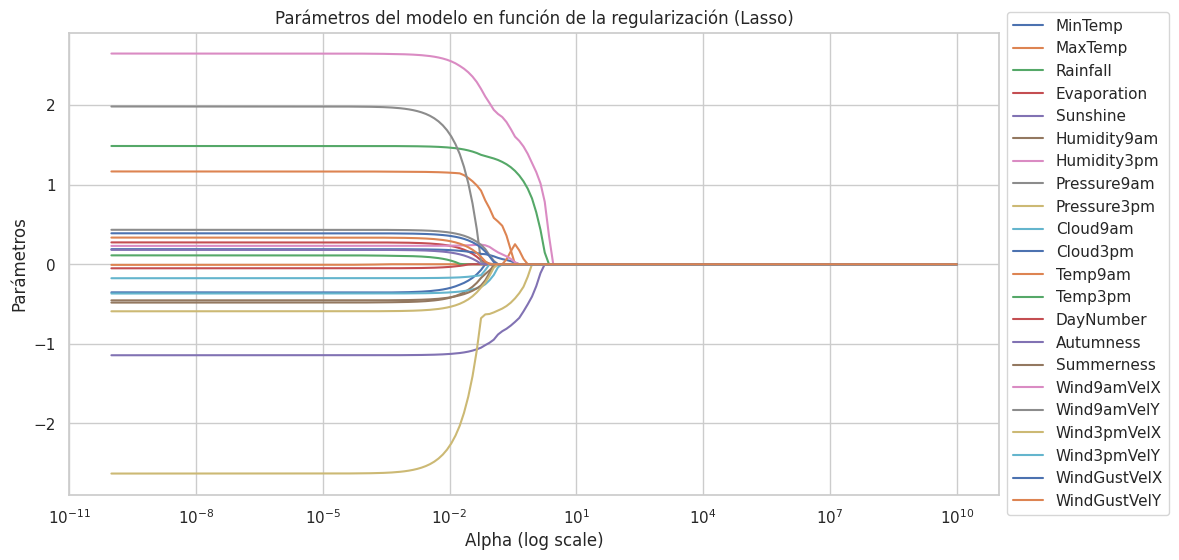

In [288]:

x_df = pd.DataFrame(x_train)

# Asignar nombres a las columnas
x_df.columns = ['MinTemp', 'MaxTemp', 'Rainfall' ,'Evaporation' ,'Sunshine', 'Humidity9am',
                    'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm',
                    'DayNumber','Autumness', 'Summerness', 'Wind9amVelX', 'Wind9amVelY', 'Wind3pmVelX', 'Wind3pmVelY',
                    'WindGustVelX', 'WindGustVelY']

# Definir una serie de valores de alpha
alphas = np.logspace(-10, 10, 200)

# Inicializar una lista para almacenar los coeficientes del modelo
coefs = []

# Ajustar el modelo Lasso para diferentes valores de alpha y registrar los coeficientes
for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_reg_train)
    coefs.append(model.coef_)

# Convertir la lista de coeficientes en un arreglo numpy
coefs = np.array(coefs)

column_names = x_df.columns

# Graficar la evolución de los coeficientes en función de alpha con nombres de columna
plt.figure(figsize=(12, 6))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i], label=column_names[i])

plt.xscale('log')
plt.title('Parámetros del modelo en función de la regularización (Lasso)')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Parámetros')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Colocar la leyenda fuera del gráfico
plt.axis('tight')
plt.show()

##### Métricas

In [289]:
mae = mean_absolute_error(y_reg_test, y_pred)
print(mae)

3.1795577377954145


MAE del modelo con Lasso y sobre el test set = 3,18

#### Ridge

In [290]:
# Creación del modelo Ridge con validación cruzada para encontrar el valor óptimo de alpha
ridge = RidgeCV(alphas=np.logspace(-10, 10, 200), cv=10)
ridge.fit(x_train, y_reg_train)

# Predicciones con el modelo Ridge
y_pred = ridge.predict(x_test)

In [291]:
print("Mejor Alfa:", ridge.alpha_)

Mejor Alfa: 91.15888299750837


##### Parámetros regularizados

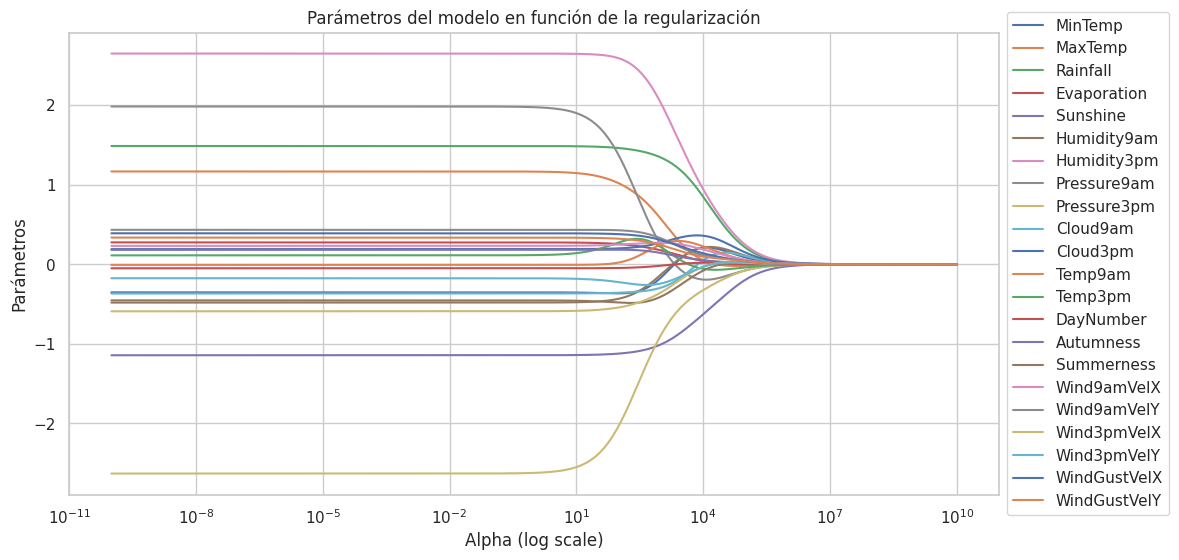

In [292]:

x_df = pd.DataFrame(x_train)

# Asignar nombres a las columnas
x_df.columns = ['MinTemp', 'MaxTemp', 'Rainfall' ,'Evaporation' ,'Sunshine', 'Humidity9am',
                    'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 	'Cloud3pm','Temp9am', 'Temp3pm',
                    'DayNumber','Autumness', 'Summerness', 'Wind9amVelX', 'Wind9amVelY', 'Wind3pmVelX', 'Wind3pmVelY',
                    'WindGustVelX', 'WindGustVelY']

# Definir una serie de valores de alpha
alphas = np.logspace(-10, 10, 200)

# Inicializar una lista para almacenar los coeficientes del modelo
coefs = []

# Ajustar el modelo Ridge para diferentes valores de alpha y registrar los coeficientes
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_reg_train)
    coefs.append(model.coef_)

# Convertir la lista de coeficientes en un arreglo numpy
coefs = np.array(coefs)


column_names = x_df.columns

# Graficar la evolución de los coeficientes en función de alpha con nombres de columna
plt.figure(figsize=(12, 6))
for i in range(coefs.shape[1]):
    plt.plot(alphas, coefs[:, i], label=column_names[i])

plt.xscale('log')
plt.title('Parámetros del modelo en función de la regularización')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Parámetros')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Colocar la leyenda fuera del gráfico
plt.axis('tight')
plt.show()

##### Métricas

In [293]:
mae = mean_absolute_error(y_reg_test, y_pred)
print(mae)

3.17100212899497


MAE del modelo con Ridge y sobre el test set = 3,17

#### Elasticnet

In [294]:
elastic_net = ElasticNetCV(l1_ratio = [0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99], alphas = np.insert(np.logspace(-1, 1, 200), 0, 0), cv = 10)
elastic_net.fit(x_train, y_reg_train)
y_pred = elastic_net.predict(x_test);

In [295]:
print("Mejor L1 Ratio:", elastic_net.l1_ratio_)
print("Mejor Alfa:", elastic_net.alpha_)

Mejor L1 Ratio: 0.1
Mejor Alfa: 0.0


##### Métricas

In [296]:
mae = mean_absolute_error(y_reg_test, y_pred)
print(mae)

3.184477626031427


MAE del modelo con ElasticNet y sobre el test set = 3,18

Da igual cualquier tipo de regularización porque los CV eligen darles un peso (alfa) lo más cercano a 0 posible. Así que parece no parece haber ningún tipo de overfitting que esté intentando reducir.

## Regresión Logística

### LogisticRegression

In [297]:
# Inicializar y entrenar un modelo de regresión logística
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_class_train)

# Realizar predicciones en el conjunto de prueba
y_pred = log_reg.predict(x_test)

####Curva ROC

In [298]:
# Obtengo las probabilidades de predicción del modelo
y_probs = log_reg.predict_proba(x_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_class_test, y_probs)
roc_auc = auc(fpr, tpr)

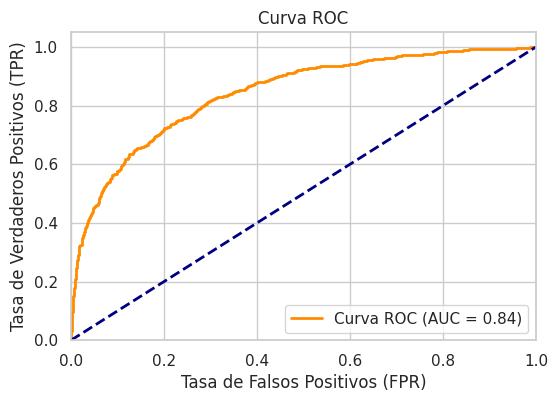

In [299]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#### Métricas

Elegimos la métrica 'f1-score' para comparar el modelo antes y después de balancearlo porque  es una métrica que tiene en cuenta tanto la precisión como el recall, lo que la hace adecuada para problemas donde hay  desequilibrio de clases como es en este caso, donde la clase que queremos predecir es la  "clase minoritaria". Nos pareció una buena decisión calcular el promedio de ambos F1, es decir, calcular un promedio de las dos clases y utilizar esto como métrica para nuestro modelo.


In [300]:
print(classification_report(y_class_test, y_pred))
print(confusion_matrix(y_class_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.89      2299
         1.0       0.73      0.46      0.56       723

    accuracy                           0.83      3022
   macro avg       0.79      0.70      0.73      3022
weighted avg       0.82      0.83      0.82      3022

[[2174  125]
 [ 390  333]]


In [301]:
print(f1_avg(y_class_test, y_pred))

0.7290135835351805


F1s = 0.89, 0.56

F1 promedio del modelo de LogisticRegression sobre el test set = 0,73

### Balanceo del dataset

#### Adentro de LogisticRegression

In [302]:
bal_log_reg = LogisticRegression(random_state=42, class_weight='balanced')
bal_log_reg.fit(x_train, y_class_train)
y_pred = bal_log_reg.predict(x_test)

print(classification_report(y_class_test, y_pred))
print(confusion_matrix(y_class_test, y_pred), '\n')
print(f1_avg(y_class_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      2299
         1.0       0.52      0.73      0.61       723

    accuracy                           0.77      3022
   macro avg       0.71      0.76      0.72      3022
weighted avg       0.81      0.77      0.79      3022

[[1811  488]
 [ 195  528]] 

0.7242964070156597


F1s = 0.84, 0.61

F1 promedio del modelo balanceado por LogisticRegression sobre el test set = 0,72

Podemos observar que mejoró el f1-score de la fila 2, pero empeoró el de la fila 1 tanto que el promedio da un poquito peor.

#### Con Over Sampling

In [303]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(x_train, y_class_train)

In [304]:
len(y_resampled[y_resampled==1]), len(y_resampled[y_resampled==0])

(9344, 9344)

In [305]:
over_log_reg = LogisticRegression(random_state=42)
over_log_reg.fit(X_resampled, y_resampled)
y_pred = over_log_reg.predict(x_test)

print(classification_report(y_class_test, y_pred))
print(confusion_matrix(y_class_test, y_pred), '\n')
print(f1_avg(y_class_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      2299
         1.0       0.52      0.73      0.61       723

    accuracy                           0.77      3022
   macro avg       0.71      0.76      0.72      3022
weighted avg       0.81      0.77      0.78      3022

[[1810  489]
 [ 196  527]] 

0.723489075850259


F1s = 0.84, 0.61

F1 promedio del modelo balanceado por oversampling sobre el test set = 0,72

#### Con Under Sampling

In [306]:
undersampler = RandomUnderSampler(random_state=42)
X_resampled2, y_resampled2 = undersampler.fit_resample(x_train, y_class_train)

In [307]:
len(y_resampled2[y_resampled2==1]), len(y_resampled2[y_resampled2==0])

(2833, 2833)

In [308]:
# Entrenar el modelo con los datos submuestreados
under_log_reg = LogisticRegression(random_state=42)
under_log_reg.fit(X_resampled2, y_resampled2)
y_pred = under_log_reg.predict(x_test)

# Evaluar el modelo
print(classification_report(y_class_test, y_pred))
print(confusion_matrix(y_class_test, y_pred), '\n')
print(f1_avg(y_class_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.78      0.84      2299
         1.0       0.52      0.73      0.61       723

    accuracy                           0.77      3022
   macro avg       0.71      0.76      0.72      3022
weighted avg       0.81      0.77      0.78      3022

[[1804  495]
 [ 192  531]] 

0.7236253412061175


F1s = 0.84, 0.61

F1 promedio del modelo balanceado por oversampling sobre el test set = 0,72

Aunque los métodos de balanceo UnderSampling, OverSampling, y el cambio de los pesos clasificaron el conjunto de test un poco diferente si se mira la matriz de confusión, son diferencias mínimas que no hacen una diferencia en el f1-score.

## Redes Neuronales

In [309]:
dict_epochs_types={
    "_250_epocas_largas":{
        "epochs": 250,
        "batch_size": 100},    #batchs: x_train: 122, x_train2: 98
    "_500_epocas_medianas":{
        "epochs": 500,
        "batch_size": 510},    #batchs: x_train: 24, x_train2: 20
    "_1000_epocas_cortas":{
        "epochs": 800,
        "batch_size": 2500}    #batchs: x_train: 5, x_train2: 4
}

###  De Clasificación

In [310]:
class ClassificationNeuralNetwork:
    def __init__(self, n_hidden_layers, n_neurons, activations, learning_rate, epochs_type=None, epochs=None, batch_size=None, metric=None):
        # Guardo los datos de los epochs para el training
        if n_hidden_layers > 2:
            print("Demasiadas capas ocultas")
            return None
        self.metric = metric
        self.epochs = epochs
        self.batch_size = batch_size
        if epochs_type is not None:
            self.epochs = dict_epochs_types[epochs_type]["epochs"]
            self.batch_size = dict_epochs_types[epochs_type]["batch_size"]

        # Inicializo el modelo
        self.model = Sequential()
        match n_hidden_layers:
            case 0:
                self.model.add(Dense(1, activation='sigmoid', input_shape=(m,)))
            case 1:
                self.model.add(Dense(n_neurons[0], activation=activations[0], input_shape=(m,)))
                self.model.add(Dense(1, activation='sigmoid'))
            case 2:
                self.model.add(Dense(n_neurons[0], activation=activations[0], input_shape=(m,)))
                self.model.add(Dense(n_neurons[1], activation=activations[1]))
                self.model.add(Dense(1, activation='sigmoid'))

        # Compilar el modelo
        custom_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        self.model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=[metric])

    def fit(self, x_train, y_train, epochs=None, batch_size=None, validation_data=None):
        if epochs is None:
            epochs = self.epochs
        if batch_size is None:
            batch_size = self.batch_size
        history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data)
        return history

    def evaluate(self, x_test, y_test):
        return self.model.evaluate(x_test, y_test)

    def predict(self, x):
        return self.model.predict(x)

    def save(self, path):
        self.model.save(path)

In [311]:
class_nn = ClassificationNeuralNetwork(n_hidden_layers=2, n_neurons=[4,2], activations=['sigmoid', 'relu'], learning_rate=0.01, epochs_type='_1000_epocas_cortas')

In [312]:
loss_history = class_nn.fit(x_train, y_class_train, validation_data=(x_test, y_class_test))

Epoch 1/800
5/5 [==============================] - 1s 57ms/step - loss: 0.5761 - val_loss: 0.5536
Epoch 2/800
5/5 [==============================] - 0s 13ms/step - loss: 0.5345 - val_loss: 0.5179
Epoch 3/800
5/5 [==============================] - 0s 12ms/step - loss: 0.5017 - val_loss: 0.4920
Epoch 4/800
5/5 [==============================] - 0s 13ms/step - loss: 0.4783 - val_loss: 0.4738
Epoch 5/800
5/5 [==============================] - 0s 11ms/step - loss: 0.4616 - val_loss: 0.4602
Epoch 6/800
5/5 [==============================] - 0s 12ms/step - loss: 0.4494 - val_loss: 0.4497
Epoch 7/800
5/5 [==============================] - 0s 16ms/step - loss: 0.4405 - val_loss: 0.4424
Epoch 8/800
5/5 [==============================] - 0s 11ms/step - loss: 0.4347 - val_loss: 0.4376
Epoch 9/800
5/5 [==============================] - 0s 12ms/step - loss: 0.4305 - val_loss: 0.4340
Epoch 10/800
5/5 [==============================] - 0s 15ms/step - loss: 0.4274 - val_loss: 0.4311
Epoch 11/800
5/5 [=

#### Errores por épocas

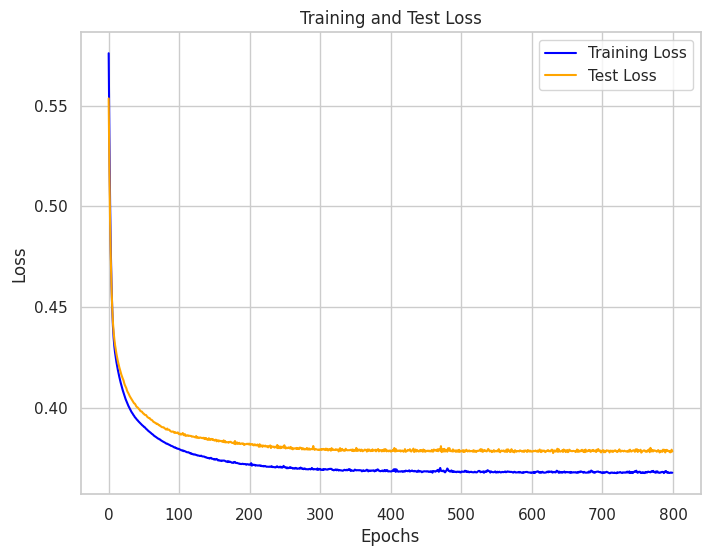

In [313]:
# Retrieve training and validation losses from the history object
training_loss = loss_history.history['loss']
validation_loss = loss_history.history['val_loss']

# Create a plot
plt.figure(figsize=(8, 6))

# Plot training and validation losses
plt.plot(training_loss, label='Training Loss', color='blue')
plt.plot(validation_loss, label='Test Loss', color='orange')

# Set plot title and labels
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.show()

#### Métricas

In [314]:
y_pred = class_nn.predict(x_test)

threshold = 0.5
y_pred = (y_pred > threshold).astype(float)

95/95 [==============================] - 0s 2ms/step


In [315]:
print(classification_report(y_class_test, y_pred))
print(confusion_matrix(y_class_test, y_pred), '\n')
print(f1_avg(y_class_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      2299
         1.0       0.72      0.52      0.60       723

    accuracy                           0.84      3022
   macro avg       0.79      0.73      0.75      3022
weighted avg       0.83      0.84      0.83      3022

[[2150  149]
 [ 348  375]] 

0.7489185218173815


F1s = 0.90, 0.60

F1 promedio de la red neuronal de clasificación = 0,75

Casi no hay mejora en los F1. Quizás por intentar minimizar la entropía cruzada en vez de maximizar el promedio de F1s

###  De Regresión

In [316]:
class RegressionNeuralNetwork:
    def __init__(self, n_hidden_layers, n_neurons, activations, learning_rate, epochs_type=None, epochs=None, batch_size=None, metric=None):
        # Guardo los datos de los epochs para el training
        if n_hidden_layers > 2:
            print("Demasiadas capas ocultas")
            return None

        self.epochs = epochs
        self.batch_size = batch_size
        if epochs_type is not None:
            self.epochs = dict_epochs_types[epochs_type]["epochs"]
            self.batch_size = dict_epochs_types[epochs_type]["batch_size"]

        # Inicializo el modelo
        self.model = Sequential()
        match n_hidden_layers:
            case 1:
                self.model.add(Dense(1, activation='relu', input_shape=(m,)))
            case 2:
                self.model.add(Dense(n_neurons[0], activation=activations[0], input_shape=(m,)))
                self.model.add(Dense(1, activation='relu'))
            case 3:
                self.model.add(Dense(n_neurons[0], activation=activations[0], input_shape=(m,)))
                self.model.add(Dense(n_neurons[1], activation=activations[1]))
                self.model.add(Dense(1, activation='relu'))

        # Compilar el modelo
        custom_optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        self.model.compile(optimizer=custom_optimizer, loss='mean_absolute_error', metrics=[metric])

    def fit(self, x_train, y_train, epochs=None, batch_size=None, validation_data=None):
        if epochs is None:
            epochs = self.epochs
        if batch_size is None:
            batch_size = self.batch_size
        history = self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data)
        return history

    def evaluate(self, x_test, y_test):
        return self.model.evaluate(x_test, y_test)

    def predict(self, x):
        return self.model.predict(x)

    def save(self, path):
        self.model.save(path)

In [361]:
reg_nn = RegressionNeuralNetwork(2, [4, 2], ['relu', 'sigmoid'], 0.01)

In [362]:
loss_history = reg_nn.fit(x_train, y_reg_train, epochs=1300, batch_size=4100, validation_data=(x_test, y_reg_test))

Epoch 1/1300
3/3 [==============================] - 2s 272ms/step - loss: 2.3138 - val_loss: 2.3856
Epoch 2/1300
3/3 [==============================] - 0s 38ms/step - loss: 2.2834 - val_loss: 2.3683
Epoch 3/1300
3/3 [==============================] - 0s 38ms/step - loss: 2.2689 - val_loss: 2.3562
Epoch 4/1300
3/3 [==============================] - 0s 42ms/step - loss: 2.2590 - val_loss: 2.3440
Epoch 5/1300
3/3 [==============================] - 0s 38ms/step - loss: 2.2475 - val_loss: 2.3305
Epoch 6/1300
3/3 [==============================] - 0s 29ms/step - loss: 2.2345 - val_loss: 2.3136
Epoch 7/1300
3/3 [==============================] - 0s 36ms/step - loss: 2.2178 - val_loss: 2.2956
Epoch 8/1300
3/3 [==============================] - 0s 37ms/step - loss: 2.2001 - val_loss: 2.2778
Epoch 9/1300
3/3 [==============================] - 0s 41ms/step - loss: 2.1845 - val_loss: 2.2608
Epoch 10/1300
3/3 [==============================] - 0s 35ms/step - loss: 2.1688 - val_loss: 2.2456
Epoch 11

#### Errores por épocas

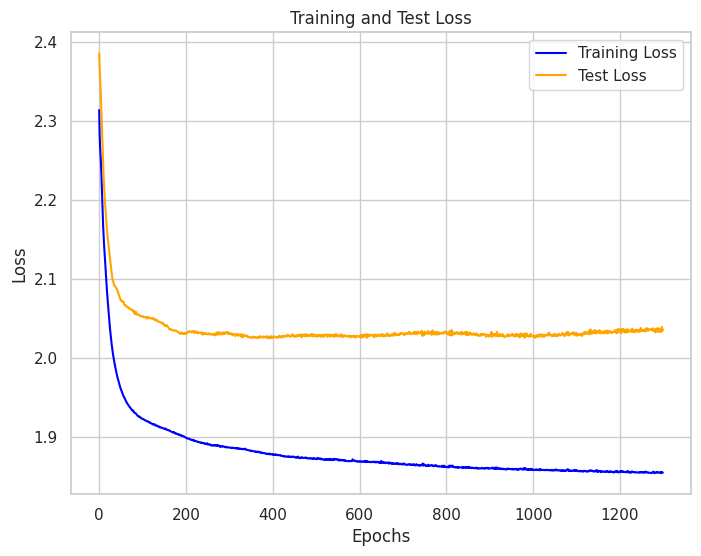

In [363]:
# Retrieve training and validation losses from the history object
training_loss = loss_history.history['loss']
validation_loss = loss_history.history['val_loss']

# Create a plot
plt.figure(figsize=(8, 6))

# Plot training and validation losses
plt.plot(training_loss, label='Training Loss', color='blue')
plt.plot(validation_loss, label='Test Loss', color='orange')

# Set plot title and labels
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### Métricas

In [364]:
y_pred = reg_nn.predict(x_test)

y_pred = y_pred.flatten()

95/95 [==============================] - 0s 1ms/step


In [365]:
mae = mean_absolute_error(y_reg_test, y_pred)
print(mae)

2.035776794244721


El MAE = 2,05 mejoró considerablemente respecto a los anteriores (3,15+)


## Optimización de hiperparámetros

Elegimos Optuna para ajustar los hiperparámetros de nuestro modelo debido a su eficiencia en explorar configuraciones. Se adapta según los datos anteriores, acelerando la búsqueda de configuraciones prometedoras. Además, minimiza la necesidad de evaluaciones.

In [322]:
# Dividir los datos en conjuntos de entrenamiento y validación
x_train2, x_val = train_test_split(x_train, test_size=0.2, random_state=42)
y_reg_train2, y_reg_val = train_test_split(y_reg_train, test_size=0.2, random_state=42)
y_class_train2, y_class_val = train_test_split(y_class_train, test_size=0.2, random_state=42)

### Para Regresión Lineal

In [323]:
# Define the objective function for Optuna
def objective(trial):
    params = {
      # Define hyperparameters to search
      'l1_ratio': trial.suggest_categorical('l1_ratio', [0.01, 0.2, 0.5, 0.8, 0.99]),
      'alpha': trial.suggest_float('alpha', 0, 1)
    }

    # Create and train the ElasticNet model with suggested hyperparameters
    opt_elastic_net = ElasticNet(random_state=42, **params)
    opt_elastic_net.fit(x_train2, y_reg_train2)

    # Make predictions on the test set
    y_pred = opt_elastic_net.predict(x_val)

    # Evaluate the model using R^2 score
    mae = mean_absolute_error(y_reg_val, y_pred)

    return mae

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

[I 2023-12-18 01:48:44,300] A new study created in memory with name: no-name-b44cb85d-8687-444d-b1f6-6774c5f0842d
[I 2023-12-18 01:48:44,329] Trial 0 finished with value: 3.1937871608363637 and parameters: {'l1_ratio': 0.99, 'alpha': 0.17430864951439096}. Best is trial 0 with value: 3.1937871608363637.
[I 2023-12-18 01:48:44,353] Trial 1 finished with value: 3.1209875176817827 and parameters: {'l1_ratio': 0.01, 'alpha': 0.8664881936476352}. Best is trial 1 with value: 3.1209875176817827.
[I 2023-12-18 01:48:44,373] Trial 2 finished with value: 3.123519188750025 and parameters: {'l1_ratio': 0.8, 'alpha': 0.6579875332164297}. Best is trial 1 with value: 3.1209875176817827.
[I 2023-12-18 01:48:44,392] Trial 3 finished with value: 3.1438569198068658 and parameters: {'l1_ratio': 0.99, 'alpha': 0.5159916852489821}. Best is trial 1 with value: 3.1209875176817827.
[I 2023-12-18 01:48:44,414] Trial 4 finished with value: 3.1350327608244886 and parameters: {'l1_ratio': 0.8, 'alpha': 0.3901088791

In [324]:
# Get the best hyperparameters
best_params = study.best_params
print("Número total de ensayos:", len(study.trials))
print(f"Mejores hiperparámetros:", best_params)

Número total de ensayos: 100
Mejores hiperparámetros: {'l1_ratio': 0.2, 'alpha': 0.9479024429208727}


In [325]:
# Train the ElasticNet model with the best hyperparameters
best_lin_reg = ElasticNet(random_state = 42, **best_params)
best_lin_reg.fit(x_train, y_reg_train);

#### Métricas

In [326]:
# Make predictions on the test set using the best model
y_pred = best_lin_reg.predict(x_test)

mae = mean_absolute_error(y_reg_test, y_pred)
print(mae)

3.008462943713036


El MAE = 3,01 de la LinearRegression optimizada parece haber encontrado unos valores de regularización que mejoraron el rendimiento anterior (3,18) debido a estar buscando minimizarlo ahora, mientras que las otras funciones minimizaban la suma de los residuos al cuadrado.

### Para Regresión Logística

In [327]:
# Función objetivo para Optuna
def objective(trial):
    params = {
      'C': trial.suggest_float('C', 1e-5, 1, log=True),
      'max_iter': trial.suggest_int('max_iter', 100, 500),
      'penalty': trial.suggest_categorical('penalty', ['l2', None]), #l1, elasticnet
      #'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear]),
      'class_weight': trial.suggest_categorical('class_weight', ['balanced', None])
    }

    # Crear el modelo con los valores sugeridos de C y max_iter
    opt_log_reg = LogisticRegression(random_state=42, **params)

    # Ajustar el modelo
    opt_log_reg.fit(x_train2, y_class_train2)

    # Hacer predicciones
    y_pred = opt_log_reg.predict(x_val)

    return f1_avg(y_class_val, y_pred)

# Crear el estudio de Optuna y optimizar la función objetivo
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-12-18 01:48:49,195] A new study created in memory with name: no-name-443e536e-9e41-4c81-ae04-59573f2e7c08
[I 2023-12-18 01:48:49,346] Trial 0 finished with value: 0.7227880512091038 and parameters: {'C': 1.1811402261277849e-05, 'max_iter': 310, 'penalty': None, 'class_weight': None}. Best is trial 0 with value: 0.7227880512091038.
[I 2023-12-18 01:48:49,551] Trial 1 finished with value: 0.7285949233950473 and parameters: {'C': 0.00012512566832466118, 'max_iter': 397, 'penalty': None, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.7285949233950473.
[I 2023-12-18 01:48:49,611] Trial 2 finished with value: 0.7017992468827979 and parameters: {'C': 8.314112984810659e-05, 'max_iter': 430, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 1 with value: 0.7285949233950473.
[I 2023-12-18 01:48:49,751] Trial 3 finished with value: 0.7227880512091038 and parameters: {'C': 0.729435698667684, 'max_iter': 181, 'penalty': None, 'class_weight': None}. Best is trial 1 with

In [328]:
# Obtener los mejores hiperparámetros
best_params = study.best_params
print("Número total de ensayos:", len(study.trials))
print("Mejores hiperparámetros:", best_params)

Número total de ensayos: 100
Mejores hiperparámetros: {'C': 0.00012512566832466118, 'max_iter': 397, 'penalty': None, 'class_weight': 'balanced'}


In [329]:
# Crear el modelo con los mejores hiperparámetros
best_log_reg = LogisticRegression(random_state=42, **best_params)
# Ajustar el modelo con los datos de entrenamiento
best_log_reg.fit(x_train, y_class_train);

#### Métricas

In [330]:
# Hacer predicciones con el conjunto de prueba
y_pred = best_log_reg.predict(x_test)

print(classification_report(y_class_test, y_pred), '\n')
print(f1_avg(y_class_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      2299
         1.0       0.52      0.73      0.61       723

    accuracy                           0.77      3022
   macro avg       0.71      0.76      0.72      3022
weighted avg       0.81      0.77      0.79      3022
 

0.7239873093193181


El F1 promedio del modelo de LogisticRegression optimizado es = 0,73 y no mejoró respecto al original.

###  Para Red Neuronal de Clasificación

In [331]:
def f1_avg_tf(y_true, y_pred):
    # Calculate true positives, false positives, false negatives for each class
    TP = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 1), tf.equal(tf.round(y_pred), 1)), tf.float32))
    FP = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 0), tf.equal(tf.round(y_pred), 1)), tf.float32))
    FN = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 1), tf.equal(tf.round(y_pred), 0)), tf.float32))
    TN = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 0), tf.equal(tf.round(y_pred), 0)), tf.float32))

    precision_1 = TP / (TP + FP + tf.keras.backend.epsilon())
    recall_1 = TP / (TP + FN + tf.keras.backend.epsilon())

    precision_0 = TN / (TN + FN + tf.keras.backend.epsilon())
    recall_0 = TN / (TN + FP + tf.keras.backend.epsilon())

    f1_1 = 2 * precision_1 * recall_1 / (precision_1 + recall_1 + tf.keras.backend.epsilon())
    f1_0 = 2 * precision_0 * recall_0 / (precision_0 + recall_0 + tf.keras.backend.epsilon())

    f1 = (f1_1 + f1_0)/2

    # Return F1 scores for each class
    return f1

In [332]:
# Definir la función objetivo para Optuna
def objective(trial):
    #Hiperparámetros:
    params = {
        "metric": f1_avg_tf,
        "n_hidden_layers": trial.suggest_int('n_hidden_layers', 1, 2),
        "learning_rate": trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        "epochs_type": trial.suggest_categorical('epochs_type', ['_250_epocas_largas', '_500_epocas_medianas', '_1000_epocas_cortas'])
    }
    n_hidden_layers = params["n_hidden_layers"]
    params["activations"] = ["sigmoid"] * n_hidden_layers
    params["n_neurons"] = [1] * n_hidden_layers

    for i in range(n_hidden_layers):
        params["n_neurons"][i] = trial.suggest_int(f'n_neurons_{i}', 1, 4)
        params["activations"][i] = trial.suggest_categorical(f'activations_{i}', ['relu', 'sigmoid', 'tanh'])

    # Creación
    opt_class_nn = ClassificationNeuralNetwork(**params)

    # Entrenar el modelo
    loss_history = opt_class_nn.fit(x_train2, y_class_train2, validation_data=(x_val, y_class_val))

    # Evaluar el modelo
    return opt_class_nn.evaluate(x_val, y_class_val)[1] #el 0 tiene el loss

# Crear un estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2023-12-18 01:49:02,490] A new study created in memory with name: no-name-02472316-8c26-4a0f-b93f-87dc0935a7d6


Epoch 1/500
20/20 [==============================] - 2s 33ms/step - loss: 0.5551 - f1_avg_tf: 0.4351 - val_loss: 0.5597 - val_f1_avg_tf: 0.4319
Epoch 2/500
20/20 [==============================] - 0s 10ms/step - loss: 0.5508 - f1_avg_tf: 0.4357 - val_loss: 0.5564 - val_f1_avg_tf: 0.4319
Epoch 3/500
20/20 [==============================] - 0s 8ms/step - loss: 0.5475 - f1_avg_tf: 0.4333 - val_loss: 0.5538 - val_f1_avg_tf: 0.4319
Epoch 4/500
20/20 [==============================] - 0s 10ms/step - loss: 0.5450 - f1_avg_tf: 0.4342 - val_loss: 0.5518 - val_f1_avg_tf: 0.4319
Epoch 5/500
20/20 [==============================] - 0s 7ms/step - loss: 0.5429 - f1_avg_tf: 0.4340 - val_loss: 0.5501 - val_f1_avg_tf: 0.4319
Epoch 6/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5412 - f1_avg_tf: 0.4356 - val_loss: 0.5486 - val_f1_avg_tf: 0.4319
Epoch 7/500
20/20 [==============================] - 0s 8ms/step - loss: 0.5395 - f1_avg_tf: 0.4348 - val_loss: 0.5470 - val_f1_avg_tf: 0.4

[I 2023-12-18 01:50:26,656] Trial 0 finished with value: 0.7192529439926147 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.0010910441563918053, 'epochs_type': '_500_epocas_medianas', 'n_neurons_0': 1, 'activations_0': 'sigmoid', 'n_neurons_1': 3, 'activations_1': 'sigmoid'}. Best is trial 0 with value: 0.7192529439926147.


Epoch 1/800
4/4 [==============================] - 2s 142ms/step - loss: 0.8474 - f1_avg_tf: 0.2290 - val_loss: 0.6487 - val_f1_avg_tf: 0.6783
Epoch 2/800
4/4 [==============================] - 0s 25ms/step - loss: 0.5845 - f1_avg_tf: 0.4961 - val_loss: 0.5112 - val_f1_avg_tf: 0.4323
Epoch 3/800
4/4 [==============================] - 0s 29ms/step - loss: 0.4928 - f1_avg_tf: 0.4347 - val_loss: 0.4866 - val_f1_avg_tf: 0.4323
Epoch 4/800
4/4 [==============================] - 0s 25ms/step - loss: 0.4765 - f1_avg_tf: 0.4347 - val_loss: 0.4818 - val_f1_avg_tf: 0.4323
Epoch 5/800
4/4 [==============================] - 0s 27ms/step - loss: 0.4682 - f1_avg_tf: 0.4347 - val_loss: 0.4684 - val_f1_avg_tf: 0.4323
Epoch 6/800
4/4 [==============================] - 0s 21ms/step - loss: 0.4538 - f1_avg_tf: 0.4345 - val_loss: 0.4522 - val_f1_avg_tf: 0.4323
Epoch 7/800
4/4 [==============================] - 0s 25ms/step - loss: 0.4403 - f1_avg_tf: 0.4347 - val_loss: 0.4385 - val_f1_avg_tf: 0.4323
Epoch

[I 2023-12-18 01:51:50,261] Trial 1 finished with value: 0.7045941948890686 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.06965934355590934, 'epochs_type': '_1000_epocas_cortas', 'n_neurons_0': 3, 'activations_0': 'tanh', 'n_neurons_1': 4, 'activations_1': 'sigmoid'}. Best is trial 0 with value: 0.7192529439926147.


Epoch 1/250
98/98 [==============================] - 2s 6ms/step - loss: 0.7841 - f1_avg_tf: 0.3476 - val_loss: 0.6986 - val_f1_avg_tf: 0.5260
Epoch 2/250
98/98 [==============================] - 0s 3ms/step - loss: 0.6572 - f1_avg_tf: 0.5884 - val_loss: 0.6275 - val_f1_avg_tf: 0.6142
Epoch 3/250
98/98 [==============================] - 0s 4ms/step - loss: 0.6057 - f1_avg_tf: 0.6154 - val_loss: 0.5908 - val_f1_avg_tf: 0.6172
Epoch 4/250
98/98 [==============================] - 0s 4ms/step - loss: 0.5746 - f1_avg_tf: 0.6225 - val_loss: 0.5664 - val_f1_avg_tf: 0.6206
Epoch 5/250
98/98 [==============================] - 0s 4ms/step - loss: 0.5520 - f1_avg_tf: 0.5739 - val_loss: 0.5469 - val_f1_avg_tf: 0.4317
Epoch 6/250
98/98 [==============================] - 0s 4ms/step - loss: 0.5338 - f1_avg_tf: 0.4342 - val_loss: 0.5305 - val_f1_avg_tf: 0.4317
Epoch 7/250
98/98 [==============================] - 0s 3ms/step - loss: 0.5185 - f1_avg_tf: 0.4343 - val_loss: 0.5161 - val_f1_avg_tf: 0.4317

[I 2023-12-18 01:53:15,341] Trial 2 finished with value: 0.7223179340362549 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.0020096556393074715, 'epochs_type': '_250_epocas_largas', 'n_neurons_0': 2, 'activations_0': 'relu', 'n_neurons_1': 2, 'activations_1': 'sigmoid'}. Best is trial 2 with value: 0.7223179340362549.


Epoch 1/800
4/4 [==============================] - 1s 99ms/step - loss: 0.7282 - f1_avg_tf: 0.4728 - val_loss: 0.6809 - val_f1_avg_tf: 0.5173
Epoch 2/800
4/4 [==============================] - 0s 23ms/step - loss: 0.6613 - f1_avg_tf: 0.5372 - val_loss: 0.6313 - val_f1_avg_tf: 0.5239
Epoch 3/800
4/4 [==============================] - 0s 17ms/step - loss: 0.6171 - f1_avg_tf: 0.4719 - val_loss: 0.5987 - val_f1_avg_tf: 0.4410
Epoch 4/800
4/4 [==============================] - 0s 22ms/step - loss: 0.5870 - f1_avg_tf: 0.4362 - val_loss: 0.5762 - val_f1_avg_tf: 0.4323
Epoch 5/800
4/4 [==============================] - 0s 28ms/step - loss: 0.5655 - f1_avg_tf: 0.4346 - val_loss: 0.5597 - val_f1_avg_tf: 0.4323
Epoch 6/800
4/4 [==============================] - 0s 25ms/step - loss: 0.5494 - f1_avg_tf: 0.4347 - val_loss: 0.5461 - val_f1_avg_tf: 0.4323
Epoch 7/800
4/4 [==============================] - 0s 26ms/step - loss: 0.5356 - f1_avg_tf: 0.4347 - val_loss: 0.5326 - val_f1_avg_tf: 0.4359
Epoch 

[I 2023-12-18 01:54:24,042] Trial 3 finished with value: 0.7074533104896545 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.012351549876458461, 'epochs_type': '_1000_epocas_cortas', 'n_neurons_0': 1, 'activations_0': 'relu', 'n_neurons_1': 4, 'activations_1': 'tanh'}. Best is trial 2 with value: 0.7223179340362549.


Epoch 1/250
98/98 [==============================] - 1s 5ms/step - loss: 0.5922 - f1_avg_tf: 0.4785 - val_loss: 0.5012 - val_f1_avg_tf: 0.5785
Epoch 2/250
98/98 [==============================] - 0s 3ms/step - loss: 0.4514 - f1_avg_tf: 0.6688 - val_loss: 0.4229 - val_f1_avg_tf: 0.6970
Epoch 3/250
98/98 [==============================] - 0s 3ms/step - loss: 0.4173 - f1_avg_tf: 0.7021 - val_loss: 0.4095 - val_f1_avg_tf: 0.7010
Epoch 4/250
98/98 [==============================] - 0s 3ms/step - loss: 0.4070 - f1_avg_tf: 0.7090 - val_loss: 0.4052 - val_f1_avg_tf: 0.7102
Epoch 5/250
98/98 [==============================] - 0s 3ms/step - loss: 0.4031 - f1_avg_tf: 0.7164 - val_loss: 0.4042 - val_f1_avg_tf: 0.7149
Epoch 6/250
98/98 [==============================] - 0s 3ms/step - loss: 0.3993 - f1_avg_tf: 0.7200 - val_loss: 0.4029 - val_f1_avg_tf: 0.7088
Epoch 7/250
98/98 [==============================] - 0s 3ms/step - loss: 0.3987 - f1_avg_tf: 0.7162 - val_loss: 0.3989 - val_f1_avg_tf: 0.7046

[I 2023-12-18 01:56:47,299] Trial 4 finished with value: 0.7007679343223572 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.0066148336758782705, 'epochs_type': '_250_epocas_largas', 'n_neurons_0': 1, 'activations_0': 'relu', 'n_neurons_1': 2, 'activations_1': 'relu'}. Best is trial 2 with value: 0.7223179340362549.


Epoch 1/800
4/4 [==============================] - 2s 143ms/step - loss: 0.5249 - f1_avg_tf: 0.4347 - val_loss: 0.4602 - val_f1_avg_tf: 0.4323
Epoch 2/800
4/4 [==============================] - 0s 27ms/step - loss: 0.4550 - f1_avg_tf: 0.4347 - val_loss: 0.4540 - val_f1_avg_tf: 0.4323
Epoch 3/800
4/4 [==============================] - 0s 29ms/step - loss: 0.4477 - f1_avg_tf: 0.4347 - val_loss: 0.4366 - val_f1_avg_tf: 0.4323
Epoch 4/800
4/4 [==============================] - 0s 30ms/step - loss: 0.4352 - f1_avg_tf: 0.4344 - val_loss: 0.4362 - val_f1_avg_tf: 0.4323
Epoch 5/800
4/4 [==============================] - 0s 30ms/step - loss: 0.4340 - f1_avg_tf: 0.4345 - val_loss: 0.4316 - val_f1_avg_tf: 0.4323
Epoch 6/800
4/4 [==============================] - 0s 24ms/step - loss: 0.4281 - f1_avg_tf: 0.4348 - val_loss: 0.4254 - val_f1_avg_tf: 0.4323
Epoch 7/800
4/4 [==============================] - 0s 25ms/step - loss: 0.4236 - f1_avg_tf: 0.4347 - val_loss: 0.4220 - val_f1_avg_tf: 0.4323
Epoch

[I 2023-12-18 01:58:11,025] Trial 5 finished with value: 0.7323260307312012 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.07410098435960877, 'epochs_type': '_1000_epocas_cortas', 'n_neurons_0': 3, 'activations_0': 'tanh', 'n_neurons_1': 1, 'activations_1': 'relu'}. Best is trial 5 with value: 0.7323260307312012.


Epoch 1/250
98/98 [==============================] - 1s 5ms/step - loss: 0.4511 - f1_avg_tf: 0.7032 - val_loss: 0.3936 - val_f1_avg_tf: 0.7017
Epoch 2/250
98/98 [==============================] - 0s 3ms/step - loss: 0.3946 - f1_avg_tf: 0.7219 - val_loss: 0.3906 - val_f1_avg_tf: 0.7230
Epoch 3/250
98/98 [==============================] - 0s 3ms/step - loss: 0.3932 - f1_avg_tf: 0.7209 - val_loss: 0.3891 - val_f1_avg_tf: 0.7200
Epoch 4/250
98/98 [==============================] - 0s 3ms/step - loss: 0.3909 - f1_avg_tf: 0.7271 - val_loss: 0.3879 - val_f1_avg_tf: 0.7163
Epoch 5/250
98/98 [==============================] - 0s 4ms/step - loss: 0.3900 - f1_avg_tf: 0.7218 - val_loss: 0.3850 - val_f1_avg_tf: 0.7257
Epoch 6/250
98/98 [==============================] - 1s 6ms/step - loss: 0.3887 - f1_avg_tf: 0.7277 - val_loss: 0.3909 - val_f1_avg_tf: 0.7325
Epoch 7/250
98/98 [==============================] - 1s 6ms/step - loss: 0.3888 - f1_avg_tf: 0.7236 - val_loss: 0.3836 - val_f1_avg_tf: 0.7275

[I 2023-12-18 01:59:38,748] Trial 6 finished with value: 0.7271516919136047 and parameters: {'n_hidden_layers': 1, 'learning_rate': 0.01181153603396704, 'epochs_type': '_250_epocas_largas', 'n_neurons_0': 3, 'activations_0': 'tanh'}. Best is trial 5 with value: 0.7323260307312012.


Epoch 1/250
98/98 [==============================] - 1s 5ms/step - loss: 0.5020 - f1_avg_tf: 0.6903 - val_loss: 0.4193 - val_f1_avg_tf: 0.7124
Epoch 2/250
98/98 [==============================] - 0s 3ms/step - loss: 0.4112 - f1_avg_tf: 0.7135 - val_loss: 0.4008 - val_f1_avg_tf: 0.7162
Epoch 3/250
98/98 [==============================] - 0s 3ms/step - loss: 0.4017 - f1_avg_tf: 0.7110 - val_loss: 0.4009 - val_f1_avg_tf: 0.7149
Epoch 4/250
98/98 [==============================] - 0s 3ms/step - loss: 0.3974 - f1_avg_tf: 0.7087 - val_loss: 0.3918 - val_f1_avg_tf: 0.7129
Epoch 5/250
98/98 [==============================] - 0s 3ms/step - loss: 0.3960 - f1_avg_tf: 0.7127 - val_loss: 0.3936 - val_f1_avg_tf: 0.7119
Epoch 6/250
98/98 [==============================] - 0s 3ms/step - loss: 0.3933 - f1_avg_tf: 0.7095 - val_loss: 0.3896 - val_f1_avg_tf: 0.7255
Epoch 7/250
98/98 [==============================] - 0s 3ms/step - loss: 0.3932 - f1_avg_tf: 0.7113 - val_loss: 0.3892 - val_f1_avg_tf: 0.7279

[I 2023-12-18 02:01:09,231] Trial 7 finished with value: 0.6795121431350708 and parameters: {'n_hidden_layers': 1, 'learning_rate': 0.008107055886116047, 'epochs_type': '_250_epocas_largas', 'n_neurons_0': 2, 'activations_0': 'tanh'}. Best is trial 5 with value: 0.7323260307312012.


Epoch 1/250
98/98 [==============================] - 1s 6ms/step - loss: 0.5870 - f1_avg_tf: 0.5360 - val_loss: 0.5406 - val_f1_avg_tf: 0.5551
Epoch 2/250
98/98 [==============================] - 0s 4ms/step - loss: 0.4939 - f1_avg_tf: 0.5935 - val_loss: 0.4742 - val_f1_avg_tf: 0.6271
Epoch 3/250
98/98 [==============================] - 0s 4ms/step - loss: 0.4488 - f1_avg_tf: 0.6539 - val_loss: 0.4417 - val_f1_avg_tf: 0.6768
Epoch 4/250
98/98 [==============================] - 0s 5ms/step - loss: 0.4275 - f1_avg_tf: 0.6869 - val_loss: 0.4250 - val_f1_avg_tf: 0.6942
Epoch 5/250
98/98 [==============================] - 0s 4ms/step - loss: 0.4154 - f1_avg_tf: 0.7065 - val_loss: 0.4150 - val_f1_avg_tf: 0.7013
Epoch 6/250
98/98 [==============================] - 1s 6ms/step - loss: 0.4077 - f1_avg_tf: 0.7114 - val_loss: 0.4083 - val_f1_avg_tf: 0.7071
Epoch 7/250
98/98 [==============================] - 0s 5ms/step - loss: 0.4023 - f1_avg_tf: 0.7166 - val_loss: 0.4034 - val_f1_avg_tf: 0.7126

[I 2023-12-18 02:03:32,293] Trial 8 finished with value: 0.7254546284675598 and parameters: {'n_hidden_layers': 1, 'learning_rate': 0.0013481538269938895, 'epochs_type': '_250_epocas_largas', 'n_neurons_0': 4, 'activations_0': 'relu'}. Best is trial 5 with value: 0.7323260307312012.


Epoch 1/800
4/4 [==============================] - 1s 111ms/step - loss: 0.6086 - f1_avg_tf: 0.4425 - val_loss: 0.5489 - val_f1_avg_tf: 0.4323
Epoch 2/800
4/4 [==============================] - 0s 18ms/step - loss: 0.5314 - f1_avg_tf: 0.4345 - val_loss: 0.5236 - val_f1_avg_tf: 0.4323
Epoch 3/800
4/4 [==============================] - 0s 24ms/step - loss: 0.5133 - f1_avg_tf: 0.4346 - val_loss: 0.5170 - val_f1_avg_tf: 0.4323
Epoch 4/800
4/4 [==============================] - 0s 24ms/step - loss: 0.5029 - f1_avg_tf: 0.4346 - val_loss: 0.5001 - val_f1_avg_tf: 0.4323
Epoch 5/800
4/4 [==============================] - 0s 26ms/step - loss: 0.4832 - f1_avg_tf: 0.4346 - val_loss: 0.4760 - val_f1_avg_tf: 0.4323
Epoch 6/800
4/4 [==============================] - 0s 25ms/step - loss: 0.4613 - f1_avg_tf: 0.4346 - val_loss: 0.4543 - val_f1_avg_tf: 0.4323
Epoch 7/800
4/4 [==============================] - 0s 19ms/step - loss: 0.4437 - f1_avg_tf: 0.4347 - val_loss: 0.4407 - val_f1_avg_tf: 0.7099
Epoch

[I 2023-12-18 02:04:48,472] Trial 9 finished with value: 0.7071056962013245 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.03721590196030012, 'epochs_type': '_1000_epocas_cortas', 'n_neurons_0': 2, 'activations_0': 'sigmoid', 'n_neurons_1': 2, 'activations_1': 'tanh'}. Best is trial 5 with value: 0.7323260307312012.


In [333]:
# Obtener los mejores hiperparámetros
best_params = study.best_params
print("Número total de ensayos:", len(study.trials))
print("Mejores hiperparámetros:", best_params)

Número total de ensayos: 10
Mejores hiperparámetros: {'n_hidden_layers': 2, 'learning_rate': 0.07410098435960877, 'epochs_type': '_1000_epocas_cortas', 'n_neurons_0': 3, 'activations_0': 'tanh', 'n_neurons_1': 1, 'activations_1': 'relu'}


Recrear la red neuronal con los mejores hiperparámetros

In [334]:
# Cambiamos las keys de "n_neurons_i" a "n_neurons[i] y lo mismo con activations"
n_hidden_layers = best_params["n_hidden_layers"]
best_params['n_neurons']=[1] *n_hidden_layers
best_params['activations']=['sigmoid'] *n_hidden_layers
for i in range(n_hidden_layers):
    best_params['n_neurons'][i] = best_params.pop(f'n_neurons_{i}')
    best_params['activations'][i] = best_params.pop(f"activations_{i}")

#Create the model with the best hyperparameters
best_class_nn = ClassificationNeuralNetwork(**best_params)
loss_history = best_class_nn.fit(x_train, y_class_train, validation_data=(x_test, y_class_test));

Epoch 1/800
5/5 [==============================] - 1s 50ms/step - loss: 0.5664 - val_loss: 0.4844
Epoch 2/800
5/5 [==============================] - 0s 15ms/step - loss: 0.4674 - val_loss: 0.4771
Epoch 3/800
5/5 [==============================] - 0s 15ms/step - loss: 0.4622 - val_loss: 0.4591
Epoch 4/800
5/5 [==============================] - 0s 11ms/step - loss: 0.4479 - val_loss: 0.4507
Epoch 5/800
5/5 [==============================] - 0s 14ms/step - loss: 0.4426 - val_loss: 0.4441
Epoch 6/800
5/5 [==============================] - 0s 16ms/step - loss: 0.4347 - val_loss: 0.4406
Epoch 7/800
5/5 [==============================] - 0s 11ms/step - loss: 0.4285 - val_loss: 0.4384
Epoch 8/800
5/5 [==============================] - 0s 12ms/step - loss: 0.4244 - val_loss: 0.4315
Epoch 9/800
5/5 [==============================] - 0s 11ms/step - loss: 0.4202 - val_loss: 0.4279
Epoch 10/800
5/5 [==============================] - 0s 17ms/step - loss: 0.4156 - val_loss: 0.4242
Epoch 11/800
5/5 [=

#### Errores por épocas

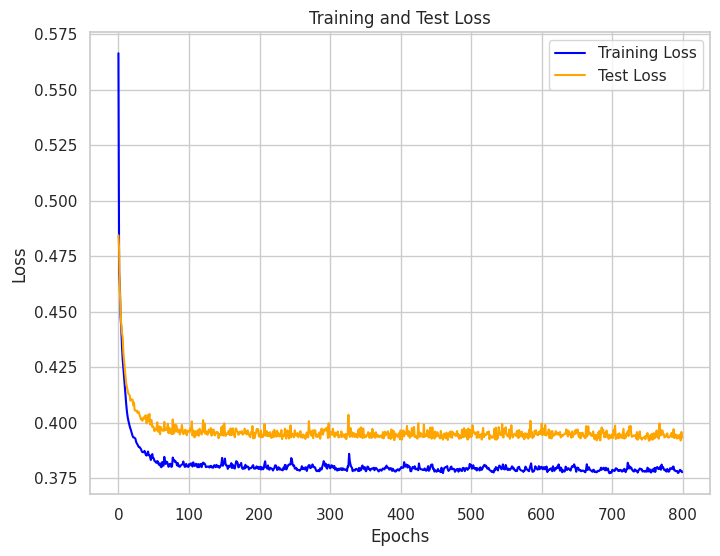

In [335]:
# Retrieve training and validation losses from the history object
training_loss = loss_history.history['loss']
validation_loss = loss_history.history['val_loss']

# Create a plot
plt.figure(figsize=(8, 6))

# Plot training and validation losses
plt.plot(training_loss, label='Training Loss', color='blue')
plt.plot(validation_loss, label='Test Loss', color='orange')

# Set plot title and labels
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()

No es la F1 pero sirve para darse una idea del comportamiento de la misma.

#### Métricas

In [336]:
# Make predictions on the test set using the best model
y_pred = best_class_nn.predict(x_test)
threshold = 0.5
y_pred = (y_pred > threshold).astype(float)

# Evaluate the final model using F1
f1 = f1_avg(y_class_test, y_pred)
print(f1)

95/95 [==============================] - 0s 1ms/step
0.7504646198559464


El F1 promedio de una red neuronal de clasificación optimizada es = 0,75 y prácticamente ni mejoró frente a la red neuronal original.

### Para Red Neuronal de Regresión

In [337]:
# Definir la función objetivo para Optuna
def objective(trial):
    #Hiperparámetros:
    params = {
        "n_hidden_layers": trial.suggest_int('n_hidden_layers', 1, 2),
        "learning_rate": trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        "epochs_type": trial.suggest_categorical('epochs_type', ['_250_epocas_largas', '_500_epocas_medianas', '_1000_epocas_cortas'])
    }
    n_hidden_layers = params["n_hidden_layers"]
    params["activations"] = ["sigmoid"] * n_hidden_layers
    params["n_neurons"] = [1] * n_hidden_layers

    for i in range(n_hidden_layers):
        params["n_neurons"][i] = trial.suggest_int(f'n_neurons_{i}', 1, 4)
        params["activations"][i] = trial.suggest_categorical(f'activations_{i}', ['relu', 'sigmoid', 'tanh'])

    # Creación
    opt_reg_nn = RegressionNeuralNetwork(**params)

    # Entrenar el modelo
    loss_history = opt_reg_nn.fit(x_train2, y_reg_train2, validation_data=(x_val, y_reg_val))

    # Evaluar el modelo
    return opt_reg_nn.evaluate(x_val, y_reg_val)

# Crear un estudio de Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

[I 2023-12-18 02:05:52,760] A new study created in memory with name: no-name-83f3bcd6-60f3-4f5a-9eee-8ca0b296a422


Epoch 1/800
4/4 [==============================] - 1s 64ms/step - loss: 2.3910 - val_loss: 2.5521
Epoch 2/800
4/4 [==============================] - 0s 18ms/step - loss: 2.2406 - val_loss: 2.4715
Epoch 3/800
4/4 [==============================] - 0s 14ms/step - loss: 2.1901 - val_loss: 2.4641
Epoch 4/800
4/4 [==============================] - 0s 14ms/step - loss: 2.1906 - val_loss: 2.4702
Epoch 5/800
4/4 [==============================] - 0s 15ms/step - loss: 2.1941 - val_loss: 2.4674
Epoch 6/800
4/4 [==============================] - 0s 16ms/step - loss: 2.1884 - val_loss: 2.4589
Epoch 7/800
4/4 [==============================] - 0s 14ms/step - loss: 2.1799 - val_loss: 2.4517
Epoch 8/800
4/4 [==============================] - 0s 13ms/step - loss: 2.1738 - val_loss: 2.4469
Epoch 9/800
4/4 [==============================] - 0s 15ms/step - loss: 2.1698 - val_loss: 2.4431
Epoch 10/800
4/4 [==============================] - 0s 13ms/step - loss: 2.1669 - val_loss: 2.4395
Epoch 11/800
4/4 [=

[I 2023-12-18 02:07:15,805] Trial 0 finished with value: 2.151550769805908 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.028325956932148687, 'epochs_type': '_1000_epocas_cortas', 'n_neurons_0': 3, 'activations_0': 'sigmoid', 'n_neurons_1': 1, 'activations_1': 'sigmoid'}. Best is trial 0 with value: 2.151550769805908.


Epoch 1/500
20/20 [==============================] - 1s 17ms/step - loss: 2.2443 - val_loss: 2.3824
Epoch 2/500
20/20 [==============================] - 0s 6ms/step - loss: 2.0919 - val_loss: 2.3169
Epoch 3/500
20/20 [==============================] - 0s 5ms/step - loss: 2.0566 - val_loss: 2.2939
Epoch 4/500
20/20 [==============================] - 0s 6ms/step - loss: 2.0424 - val_loss: 2.2814
Epoch 5/500
20/20 [==============================] - 0s 5ms/step - loss: 2.0335 - val_loss: 2.2739
Epoch 6/500
20/20 [==============================] - 0s 5ms/step - loss: 2.0279 - val_loss: 2.2674
Epoch 7/500
20/20 [==============================] - 0s 5ms/step - loss: 2.0232 - val_loss: 2.2620
Epoch 8/500
20/20 [==============================] - 0s 7ms/step - loss: 2.0171 - val_loss: 2.2562
Epoch 9/500
20/20 [==============================] - 0s 5ms/step - loss: 2.0129 - val_loss: 2.2504
Epoch 10/500
20/20 [==============================] - 0s 5ms/step - loss: 2.0094 - val_loss: 2.2469
Epoch 11

[I 2023-12-18 02:08:07,252] Trial 1 finished with value: 2.161689281463623 and parameters: {'n_hidden_layers': 1, 'learning_rate': 0.013128005479944867, 'epochs_type': '_500_epocas_medianas', 'n_neurons_0': 2, 'activations_0': 'tanh'}. Best is trial 0 with value: 2.151550769805908.


Epoch 1/800
4/4 [==============================] - 1s 57ms/step - loss: 2.7053 - val_loss: 2.9639
Epoch 2/800
4/4 [==============================] - 0s 12ms/step - loss: 2.6817 - val_loss: 2.9418
Epoch 3/800
4/4 [==============================] - 0s 14ms/step - loss: 2.6589 - val_loss: 2.9202
Epoch 4/800
4/4 [==============================] - 0s 16ms/step - loss: 2.6360 - val_loss: 2.8991
Epoch 5/800
4/4 [==============================] - 0s 13ms/step - loss: 2.6139 - val_loss: 2.8781
Epoch 6/800
4/4 [==============================] - 0s 13ms/step - loss: 2.5922 - val_loss: 2.8575
Epoch 7/800
4/4 [==============================] - 0s 13ms/step - loss: 2.5706 - val_loss: 2.8373
Epoch 8/800
4/4 [==============================] - 0s 13ms/step - loss: 2.5501 - val_loss: 2.8174
Epoch 9/800
4/4 [==============================] - 0s 13ms/step - loss: 2.5297 - val_loss: 2.7980
Epoch 10/800
4/4 [==============================] - 0s 14ms/step - loss: 2.5098 - val_loss: 2.7790
Epoch 11/800
4/4 [=

[I 2023-12-18 02:09:29,875] Trial 2 finished with value: 2.2039284706115723 and parameters: {'n_hidden_layers': 1, 'learning_rate': 0.0021134543988141634, 'epochs_type': '_1000_epocas_cortas', 'n_neurons_0': 3, 'activations_0': 'tanh'}. Best is trial 0 with value: 2.151550769805908.


Epoch 1/250
98/98 [==============================] - 1s 4ms/step - loss: 2.1722 - val_loss: 2.3717
Epoch 2/250
98/98 [==============================] - 0s 3ms/step - loss: 2.0884 - val_loss: 2.3100
Epoch 3/250
98/98 [==============================] - 0s 3ms/step - loss: 2.0468 - val_loss: 2.2972
Epoch 4/250
98/98 [==============================] - 0s 3ms/step - loss: 2.0159 - val_loss: 2.2526
Epoch 5/250
98/98 [==============================] - 0s 3ms/step - loss: 2.0007 - val_loss: 2.2299
Epoch 6/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9863 - val_loss: 2.2253
Epoch 7/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9753 - val_loss: 2.2174
Epoch 8/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9646 - val_loss: 2.2467
Epoch 9/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9593 - val_loss: 2.2078
Epoch 10/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9632 - val_loss: 2.2112
Epoch 11/

[I 2023-12-18 02:10:52,744] Trial 3 finished with value: 2.218224287033081 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.010394092795409357, 'epochs_type': '_250_epocas_largas', 'n_neurons_0': 2, 'activations_0': 'tanh', 'n_neurons_1': 4, 'activations_1': 'sigmoid'}. Best is trial 0 with value: 2.151550769805908.


Epoch 1/800
4/4 [==============================] - 1s 55ms/step - loss: 2.5102 - val_loss: 2.7284
Epoch 2/800
4/4 [==============================] - 0s 14ms/step - loss: 2.4278 - val_loss: 2.6571
Epoch 3/800
4/4 [==============================] - 0s 22ms/step - loss: 2.3614 - val_loss: 2.6025
Epoch 4/800
4/4 [==============================] - 0s 14ms/step - loss: 2.3140 - val_loss: 2.5609
Epoch 5/800
4/4 [==============================] - 0s 15ms/step - loss: 2.2752 - val_loss: 2.5263
Epoch 6/800
4/4 [==============================] - 0s 16ms/step - loss: 2.2439 - val_loss: 2.4963
Epoch 7/800
4/4 [==============================] - 0s 17ms/step - loss: 2.2170 - val_loss: 2.4715
Epoch 8/800
4/4 [==============================] - 0s 17ms/step - loss: 2.1942 - val_loss: 2.4505
Epoch 9/800
4/4 [==============================] - 0s 16ms/step - loss: 2.1745 - val_loss: 2.4331
Epoch 10/800
4/4 [==============================] - 0s 15ms/step - loss: 2.1582 - val_loss: 2.4163
Epoch 11/800
4/4 [=

[I 2023-12-18 02:12:15,396] Trial 4 finished with value: 2.1634767055511475 and parameters: {'n_hidden_layers': 1, 'learning_rate': 0.009532624666647397, 'epochs_type': '_1000_epocas_cortas', 'n_neurons_0': 3, 'activations_0': 'sigmoid'}. Best is trial 0 with value: 2.151550769805908.


Epoch 1/250
98/98 [==============================] - 1s 4ms/step - loss: 2.0548 - val_loss: 2.2351
Epoch 2/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9931 - val_loss: 2.2185
Epoch 3/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9730 - val_loss: 2.2003
Epoch 4/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9643 - val_loss: 2.1995
Epoch 5/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9588 - val_loss: 2.1848
Epoch 6/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9547 - val_loss: 2.1945
Epoch 7/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9513 - val_loss: 2.1806
Epoch 8/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9491 - val_loss: 2.1788
Epoch 9/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9426 - val_loss: 2.1714
Epoch 10/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9458 - val_loss: 2.1730
Epoch 11/

[I 2023-12-18 02:13:38,271] Trial 5 finished with value: 2.206073045730591 and parameters: {'n_hidden_layers': 1, 'learning_rate': 0.044704641500896, 'epochs_type': '_250_epocas_largas', 'n_neurons_0': 4, 'activations_0': 'tanh'}. Best is trial 0 with value: 2.151550769805908.


Epoch 1/800
4/4 [==============================] - 1s 61ms/step - loss: 2.2580 - val_loss: 2.4885
Epoch 2/800
4/4 [==============================] - 0s 16ms/step - loss: 2.2037 - val_loss: 2.4505
Epoch 3/800
4/4 [==============================] - 0s 15ms/step - loss: 2.1651 - val_loss: 2.3936
Epoch 4/800
4/4 [==============================] - 0s 13ms/step - loss: 2.1164 - val_loss: 2.3422
Epoch 5/800
4/4 [==============================] - 0s 14ms/step - loss: 2.0835 - val_loss: 2.3151
Epoch 6/800
4/4 [==============================] - 0s 16ms/step - loss: 2.0621 - val_loss: 2.2844
Epoch 7/800
4/4 [==============================] - 0s 15ms/step - loss: 2.0330 - val_loss: 2.2608
Epoch 8/800
4/4 [==============================] - 0s 16ms/step - loss: 2.0142 - val_loss: 2.2429
Epoch 9/800
4/4 [==============================] - 0s 15ms/step - loss: 1.9952 - val_loss: 2.2265
Epoch 10/800
4/4 [==============================] - 0s 16ms/step - loss: 1.9794 - val_loss: 2.2160
Epoch 11/800
4/4 [=

[I 2023-12-18 02:14:37,553] Trial 6 finished with value: 2.173586368560791 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.04734480408922724, 'epochs_type': '_1000_epocas_cortas', 'n_neurons_0': 2, 'activations_0': 'relu', 'n_neurons_1': 2, 'activations_1': 'tanh'}. Best is trial 0 with value: 2.151550769805908.


Epoch 1/800
4/4 [==============================] - 1s 71ms/step - loss: 2.2407 - val_loss: 2.5027
Epoch 2/800
4/4 [==============================] - 0s 18ms/step - loss: 2.2181 - val_loss: 2.4840
Epoch 3/800
4/4 [==============================] - 0s 18ms/step - loss: 2.2003 - val_loss: 2.4697
Epoch 4/800
4/4 [==============================] - 0s 16ms/step - loss: 2.1861 - val_loss: 2.4587
Epoch 5/800
4/4 [==============================] - 0s 15ms/step - loss: 2.1753 - val_loss: 2.4499
Epoch 6/800
4/4 [==============================] - 0s 15ms/step - loss: 2.1666 - val_loss: 2.4416
Epoch 7/800
4/4 [==============================] - 0s 17ms/step - loss: 2.1589 - val_loss: 2.4342
Epoch 8/800
4/4 [==============================] - 0s 16ms/step - loss: 2.1521 - val_loss: 2.4277
Epoch 9/800
4/4 [==============================] - 0s 15ms/step - loss: 2.1462 - val_loss: 2.4215
Epoch 10/800
4/4 [==============================] - 0s 15ms/step - loss: 2.1404 - val_loss: 2.4159
Epoch 11/800
4/4 [=

[I 2023-12-18 02:15:38,453] Trial 7 finished with value: 2.184593677520752 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.0037538067751132368, 'epochs_type': '_1000_epocas_cortas', 'n_neurons_0': 4, 'activations_0': 'tanh', 'n_neurons_1': 2, 'activations_1': 'tanh'}. Best is trial 0 with value: 2.151550769805908.


Epoch 1/500
20/20 [==============================] - 1s 14ms/step - loss: 2.2365 - val_loss: 2.5008
Epoch 2/500
20/20 [==============================] - 0s 5ms/step - loss: 2.2242 - val_loss: 2.4954
Epoch 3/500
20/20 [==============================] - 0s 6ms/step - loss: 2.2179 - val_loss: 2.4884
Epoch 4/500
20/20 [==============================] - 0s 5ms/step - loss: 2.2106 - val_loss: 2.4794
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 2.2021 - val_loss: 2.4704
Epoch 6/500
20/20 [==============================] - 0s 5ms/step - loss: 2.1928 - val_loss: 2.4613
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 2.1841 - val_loss: 2.4533
Epoch 8/500
20/20 [==============================] - 0s 4ms/step - loss: 2.1762 - val_loss: 2.4458
Epoch 9/500
20/20 [==============================] - 0s 6ms/step - loss: 2.1689 - val_loss: 2.4389
Epoch 10/500
20/20 [==============================] - 0s 4ms/step - loss: 2.1620 - val_loss: 2.4322
Epoch 11

[I 2023-12-18 02:16:41,902] Trial 8 finished with value: 2.159959316253662 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.0024925098112735726, 'epochs_type': '_500_epocas_medianas', 'n_neurons_0': 1, 'activations_0': 'tanh', 'n_neurons_1': 4, 'activations_1': 'tanh'}. Best is trial 0 with value: 2.151550769805908.


Epoch 1/250
98/98 [==============================] - 1s 5ms/step - loss: 2.0306 - val_loss: 2.2311
Epoch 2/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9589 - val_loss: 2.2037
Epoch 3/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9436 - val_loss: 2.1870
Epoch 4/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9512 - val_loss: 2.2227
Epoch 5/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9439 - val_loss: 2.2154
Epoch 6/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9304 - val_loss: 2.1597
Epoch 7/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9346 - val_loss: 2.1580
Epoch 8/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9108 - val_loss: 2.1692
Epoch 9/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9205 - val_loss: 2.1600
Epoch 10/250
98/98 [==============================] - 0s 3ms/step - loss: 1.9018 - val_loss: 2.1673
Epoch 11/

[I 2023-12-18 02:18:04,786] Trial 9 finished with value: 2.175915241241455 and parameters: {'n_hidden_layers': 2, 'learning_rate': 0.07396972204378292, 'epochs_type': '_250_epocas_largas', 'n_neurons_0': 3, 'activations_0': 'relu', 'n_neurons_1': 2, 'activations_1': 'sigmoid'}. Best is trial 0 with value: 2.151550769805908.


In [338]:
# Obtener los mejores hiperparámetros
best_params = study.best_params
# Print the results
print("Número total de ensayos:", len(study.trials))
print("Mejores hiperparámetros:", best_params)

Número total de ensayos: 10
Mejores hiperparámetros: {'n_hidden_layers': 2, 'learning_rate': 0.028325956932148687, 'epochs_type': '_1000_epocas_cortas', 'n_neurons_0': 3, 'activations_0': 'sigmoid', 'n_neurons_1': 1, 'activations_1': 'sigmoid'}


In [339]:
# Cambiamos las keys de "n_neurons_i" a "n_neurons[i] y lo mismo con activations"
n_hidden_layers = best_params["n_hidden_layers"]
best_params['n_neurons']=[1] *n_hidden_layers
best_params['activations']=['sigmoid'] *n_hidden_layers
for i in range(n_hidden_layers):
    best_params['n_neurons'][i] = best_params.pop(f'n_neurons_{i}')
    best_params['activations'][i] = best_params.pop(f"activations_{i}")

#Create the model with the best hyperparameters
best_reg_nn = RegressionNeuralNetwork(**best_params)
loss_history = best_reg_nn.fit(x_train, y_reg_train, validation_data=(x_test, y_reg_test))

Epoch 1/800
5/5 [==============================] - 1s 55ms/step - loss: 2.2818 - val_loss: 2.3715
Epoch 2/800
5/5 [==============================] - 0s 14ms/step - loss: 2.2612 - val_loss: 2.3342
Epoch 3/800
5/5 [==============================] - 0s 15ms/step - loss: 2.2311 - val_loss: 2.3118
Epoch 4/800
5/5 [==============================] - 0s 15ms/step - loss: 2.2134 - val_loss: 2.2958
Epoch 5/800
5/5 [==============================] - 0s 15ms/step - loss: 2.1971 - val_loss: 2.2787
Epoch 6/800
5/5 [==============================] - 0s 11ms/step - loss: 2.1810 - val_loss: 2.2647
Epoch 7/800
5/5 [==============================] - 0s 11ms/step - loss: 2.1675 - val_loss: 2.2511
Epoch 8/800
5/5 [==============================] - 0s 16ms/step - loss: 2.1560 - val_loss: 2.2376
Epoch 9/800
5/5 [==============================] - 0s 12ms/step - loss: 2.1454 - val_loss: 2.2258
Epoch 10/800
5/5 [==============================] - 0s 11ms/step - loss: 2.1356 - val_loss: 2.2142
Epoch 11/800
5/5 [=

#### Errores por épocas

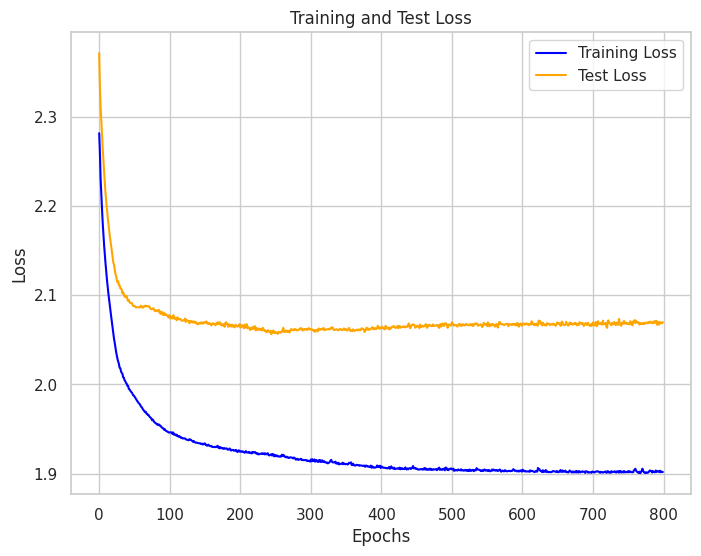

In [340]:
# Retrieve training and validation losses from the history object
training_loss = loss_history.history['loss']
validation_loss = loss_history.history['val_loss']

# Create a plot
plt.figure(figsize=(8, 6))

# Plot training and validation losses
plt.plot(training_loss, label='Training Loss', color='blue')
plt.plot(validation_loss, label='Test Loss', color='orange')

# Set plot title and labels
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()

#### Métricas

In [341]:
# Make predictions on the test set using the best model
y_pred = best_reg_nn.predict(x_test)

# Evaluate the final model using R^2 score
mae = mean_absolute_error(y_reg_test, y_pred)

print(mae)

95/95 [==============================] - 0s 2ms/step
2.069857764322974


El MAE = 1,99 mejoró aún más en la red neuronal al optimizar los hiperparámetros.

## Explicabilidad

In [342]:
!pip install shap -q
import shap

### Global de la regresión lineal

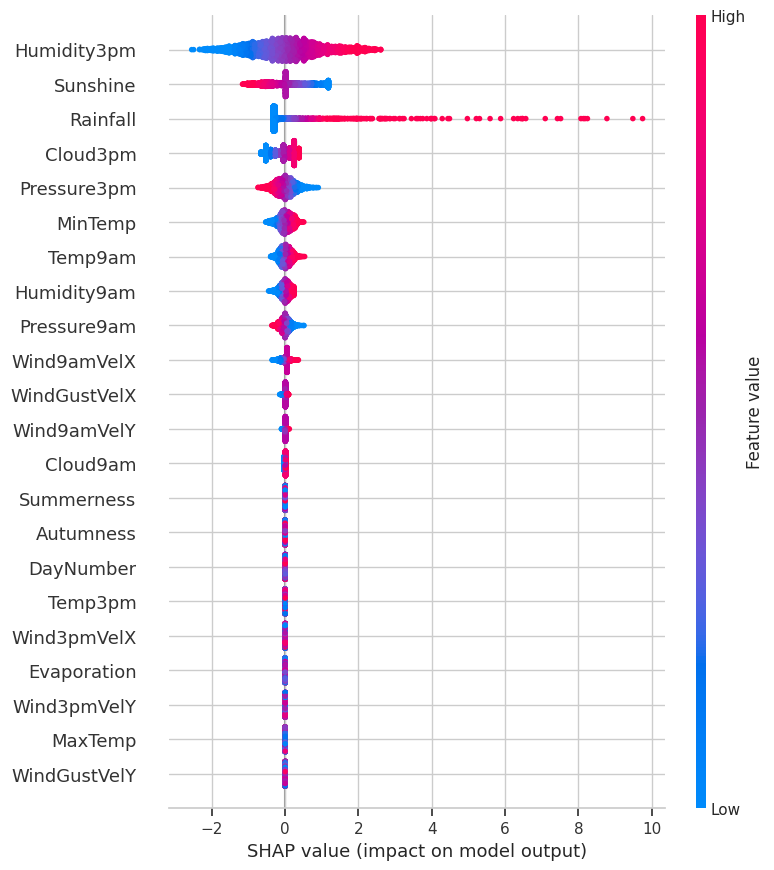

In [343]:
explainer = shap.Explainer(best_lin_reg, x_train, feature_names=df_x_train.columns)

explanation = explainer(x_test)

shap.plots.beeswarm(explanation, max_display=None)

### Global de la regresión logística

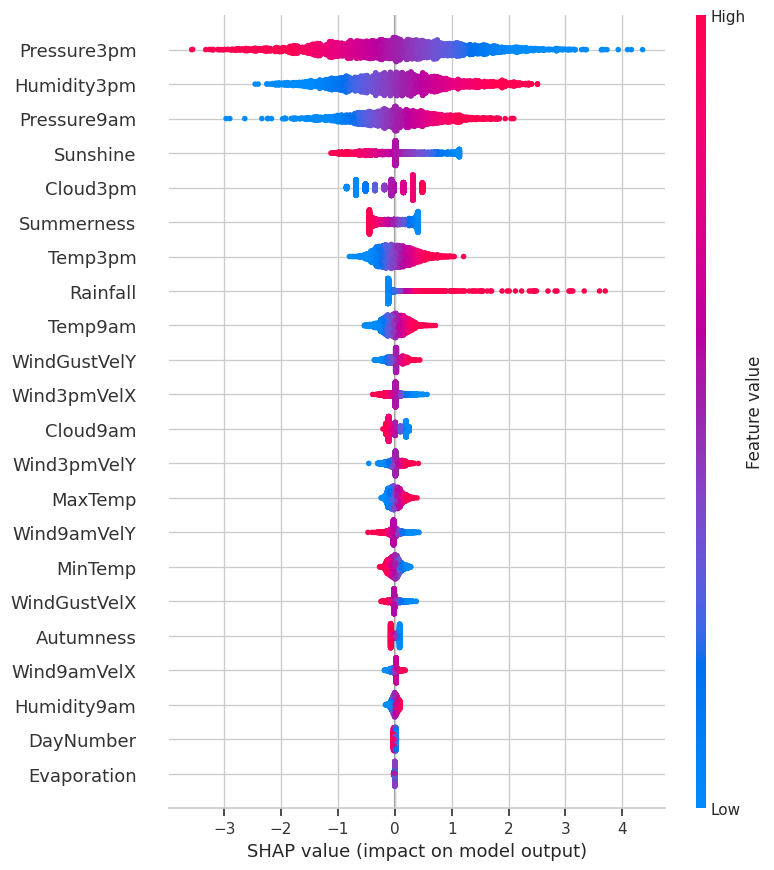

In [344]:
explainer = shap.Explainer(best_log_reg, x_train, feature_names=df_x_train.columns)

explanation = explainer(x_test)

shap.plots.beeswarm(explanation, max_display=None)

### Global de la red neuronal de clasificación

PermutationExplainer explainer: 3023it [03:22, 14.42it/s]                          


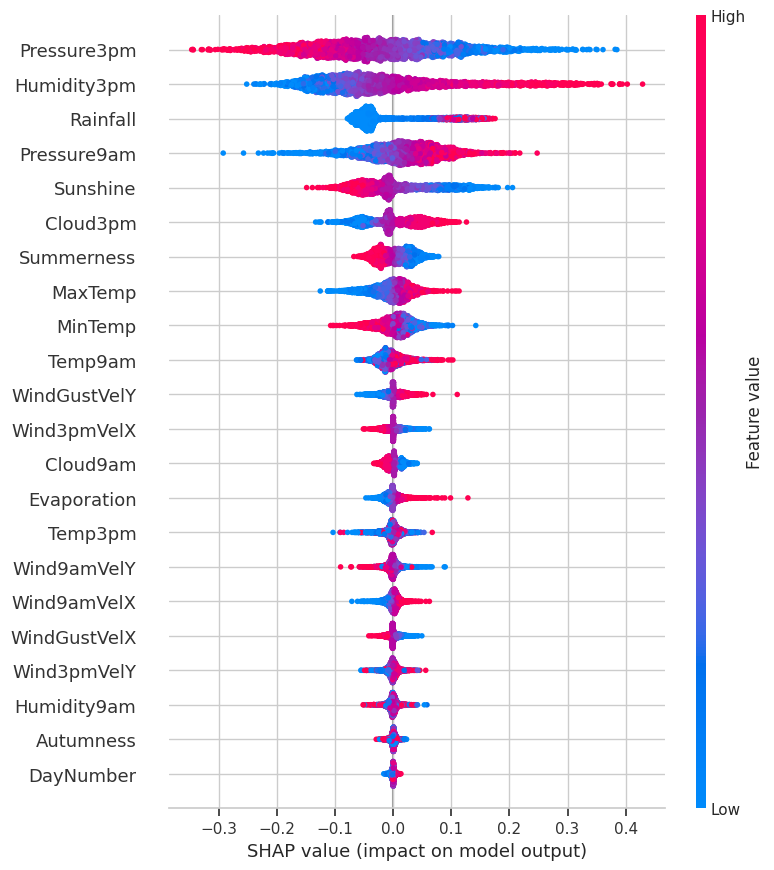

In [345]:
explainer = shap.Explainer(best_class_nn.model, x_train2, feature_names=df_x_train.columns)

explanation = explainer(x_test)

shap.plots.beeswarm(explanation, max_display=None)

### Global de la red neuronal de regresión

PermutationExplainer explainer: 3023it [02:17, 20.34it/s]                          


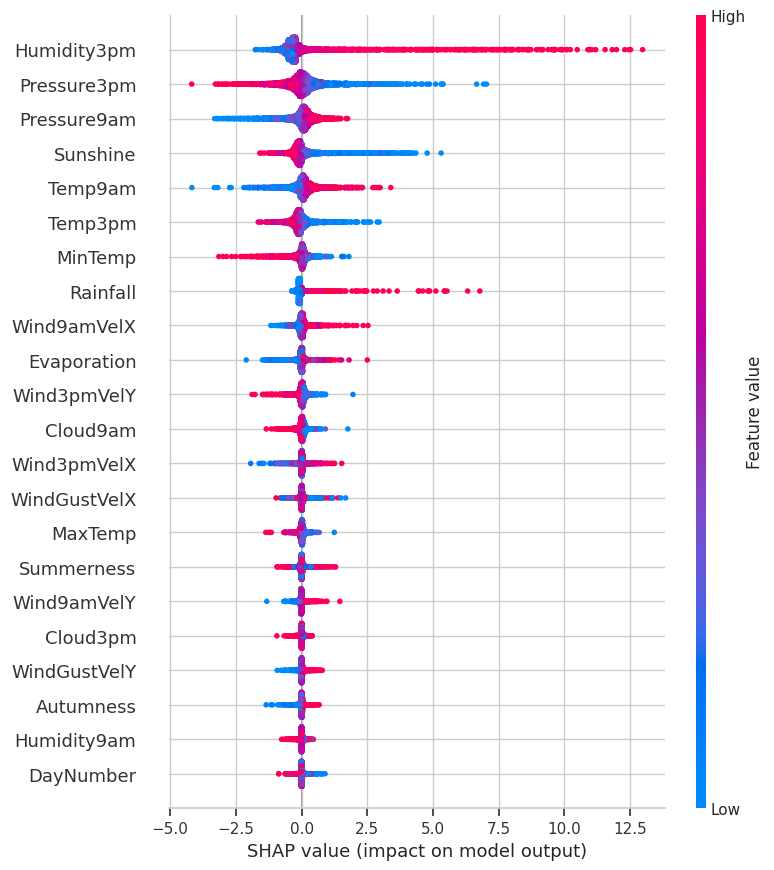

In [346]:
explainer = shap.Explainer(best_reg_nn.model, x_train, feature_names=df_x_train.columns)

explanation = explainer(x_test)

shap.plots.beeswarm(explanation, max_display=None)

### Local de la red neuronal de regresión

In [347]:
base_value = np.mean(y_reg_train)
# Usamos el explainer que fiteamos recién
shap_values = explainer.shap_values(x_test)

PermutationExplainer explainer: 3023it [00:54, 43.94it/s]                          


In [348]:
i = 42;

In [349]:
explanation = shap.Explanation(values=shap_values[i], base_values=base_value, feature_names=df_x_train.columns)

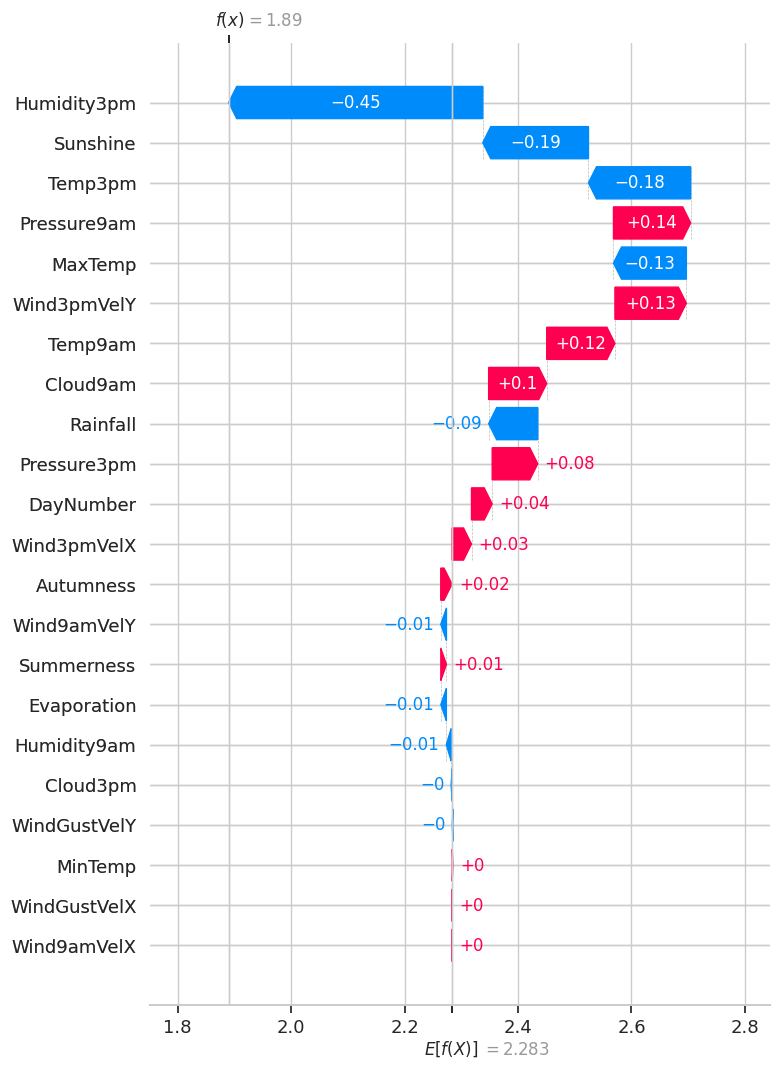

In [350]:
shap.plots.waterfall(explanation, max_display=m)

Valor final = 1,74

In [351]:
print('Valor real =', best_reg_nn.predict(x_test[i].reshape(1, -1))[0][0])

1/1 [==============================] - 0s 23ms/step
Valor real = 0.0


In [352]:
print('Desviación estándar =', y_reg_train.std())

Desviación estándar = 7.4078205944329785


Aunque la predicción real está algo lejos de lo calculado por Shap, teniendo en cuenta que la variable tiene una desviación estándar de 7,41, parece una aproximación suficientemente buena.

## MLOps

### Exportamos la pipeline y los modelos que vamos a usar

In [353]:
joblib.dump(preprocesamiento, 'preprocesamiento.joblib')
best_reg_nn.save('regresion.h5')
best_class_nn.save('clasificacion.h5')


## Conclusión del trabajo

Elegimos modelos de redes neuronales para utilizar sobre opciones tradicionales como regresión logística, regresión lineal como Lasso, Ridge, Elasticnet, y demás modelos propuestos, debido a las mejoras notables en métricas clave, como precisión y  el promedio de F1-score. Las redes neuronales sobresalen en capturar patrones complejos y no lineales en datos del mundo real, gracias a su capacidad de aprendizaje no lineal, representación jerárquica y  la capacidad de regularización integrada que contribuyen a un rendimiento más efectivo.

Esto influyó dando mejores resultados en la mayoría de los modelos de regresión; con una mejora clara respecto al modelo base (de un MAE de 3,5 a 2,0).

En clasificación podriamos haber elegido como nuestro modelo a considerar el de RandomForest el cual fue utilizado como modelo base de clasifición y llegó a lograr  un buen número de F1 = 0.78 superando a la red nuronal de clasificación, la cual logró un F1= 0.75. Como es poca la diferencia en la métrica, haber usado cualquiera de estos dos modelos hubiera estado bien.

Además pensamos que los resulados podrían ser mejorables con más tiempo de entrenamiento, afinación de hiperparámetros, y probando otras formas de procesar los datos, como manteniendo las locaciones o imputando los datos con interpolaciones. O al contrario podría ser que la naturaleza del problema no tiene más patrones significativos para aprender o se necesitarían de más datos para poder hacerlo.